In [1]:
# from packages import *
import sys
import numpy as np
from numpy.random import seed
### imports
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Turn off TensorFlow logging
import tensorflow as tf

import numpy as np
import pandas as pd
import torch
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
#from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime
import loadfile
import addons

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Input, add
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import load_model, save_model, Model


from dataset import create_train_test_file_list, Person_MealsDataset, balance_data_indices
from utils import *
from model import *


In [2]:
from dataset import *
from hysteresis_threshold import *
from cross_validation import *
from train_model import *

In [3]:

shimmer_global_mean = [-0.012359981,-0.0051663737,0.011612018,
                        0.05796114,0.1477952,-0.034395125 ]

shimmer_global_stddev = [0.05756385,0.040893298,0.043825723,
                        17.199743,15.311142,21.229317 ]

shimmer_trended_mean = [-0.000002,-0.000002,-0.000000,
                0.058144,0.147621,-0.033260 ]

shimmer_trended_stddev = [0.037592,0.034135,0.032263,
                17.209038,15.321441,21.242532 ]

all_zero_means = [0,0,0,0,0,0]

meanvals = all_zero_means
stdvals = shimmer_trended_stddev


random_seed  = 1000



In [4]:
def seed_everything(seed= 1000):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(seed= random_seed)  

In [5]:
def acti_model(input_shape):
        
        model = Sequential()
        
        model.add(Conv1D(10, 44, strides=2,activation='relu', input_shape=input_shape))
        model.add(Conv1D(10, 20, strides=2, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
        model.add(Conv1D(10, 4, strides=2, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
        model.add(GlobalAveragePooling1D())
        model.add(Dense(200, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        return model


In [6]:
# name_ls = ["tianyi","james"]
# for name in name_ls:
#     create_train_test_file_list(file_name= "all_files_list.txt",person_name =name,
#                          out_path = "../data-file-indices/",root_path= "../",
#                          test_ratio = 0.2, print_flag = True, shuffle=True, random_state=random_seed)

In [6]:
name_ls = ["wenkanw",'adam',"lawler","shaurya","tianyi","james"]
dataset_info = get_dataset_info(names= name_ls)
dataset_info

,dataset,Days,Total Hours,Meal Counts,Average Meal Counts Per Day,Average Hours Per Meal,Eating Hours,No Eating Hours,Balance Ratio(no_eat/eat)
0,wenkanw,17,129.2,32,1.9,0.2,7.7,121.5,15.8
1,adam,14,125.6,26,1.9,0.1,3.3,122.3,37.1
2,lawler,23,167.2,60,2.6,0.1,7.6,159.6,21
3,shaurya,13,134,38,2.9,0.2,9.3,124.7,13.4
4,tianyi,14,127.8,20,1.4,0.3,5.9,121.9,20.7
5,james,12,144.8,26,2.2,0.3,7,137.8,19.7
6,total,93,828.6,202,2.2,0.2,40.8,787.8,19.3
7,average,15.5,138.1,33.7,2.2,0.2,6.8,131.3,19.3


In [7]:
balance_ratio = dataset_info[dataset_info["dataset"]=="total"]['Balance Ratio(no_eat/eat)'].values[0]
balance_ratio

19.3

In [9]:
dataset_info.to_csv("../results/dataset_info.csv",index=False)

# 2. Train group model if necessary

In [10]:
# person="CAD"
# winmin= 6
# stridesec = 15
# win_size = 15*winmin*60
# model_g = acti_model(input_shape =(win_size,6) )
# model_g.compile(loss='binary_crossentropy',
#                 optimizer='adam', metrics=['accuracy'])
# perf_df_g, model_ls_g, hist_ls_g = train_models(model_g,win_ls = [winmin],EPOCHS = 20,stridesec = stridesec,model_name="test",name = person,split_day=False)


# 3. Cross validation with Group Parameters

In [22]:

hy_threshold = {'wenkanw':[0.8,0.3], 'adam':[0.8,0.3],'lawler':[0.8,0.3], 'shaurya':[0.8,0.3]}

%time meal_info, time_perf1,episode_perf1 = cross_validation_metrics(balance_ratio= balance_ratio, model_arch = acti_model, fold_num = 5, winmin=6, stridesec = 5, \
                                                             names= ["wenkanw","adam","lawler","shaurya"],model_name= "acti_model", \
                                                             random_seed=random_seed,  test_balance=False, re_train =False, \
                                                             test_CAD=False, metrics =['time','episode'], load_data =True, ind_threshold =hy_threshold)

episode_perf1 = pd.merge(left=meal_info,right=episode_perf1,on="dataset")

/home/wenkanw/.conda/envs/mlenv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Loading Dataset ...
Loading File:  ../data/IndividualData/wenkanw-data/11-14-20/11-14-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-13-20/10-13-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-9-20/10-10-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-21-20/Dinner/Dinner.shm
Loading File:  ../data/IndividualData/wenkanw-data/9-17-20/9-17-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/9-29-20/9-29-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-22-20/Lunch/Lunch.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-21-20/lunch/lunch.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-9-20/10-9-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-18-20/11-18-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-14-20/10-14-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-12-20/10-12-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-16-20/11-16-20.shm
Loading File:  ../data/Indi

100%|██████████| 4/4 [00:00<00:00, 226.83it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  3 FP:  2 FN:  4
Fold: 1 Train on days:  [ 0  1  2  3  8  9 10 11 12 13 14 15 16] Test on days:  [4 5 6 7]
Train set size: 7209, with 3604 positive samples and 3605 negative samples
Test set size: 1803, with 902 positive samples and 901 negative samples
Train on :  3604 positive samples,  3605  negative samples
Testing on :  902 positive samples,  901  negative samples
Testing on :  956 positive samples,  14209  negative samples


100%|██████████| 4/4 [00:00<00:00, 420.79it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  4 FP:  1 FN:  3
Fold: 2 Train on days:  [ 0  1  2  3  4  5  6  7 11 12 13 14 15 16] Test on days:  [ 8  9 10]
Train set size: 7222, with 3611 positive samples and 3611 negative samples
Test set size: 1806, with 903 positive samples and 903 negative samples
Train on :  3611 positive samples,  3611  negative samples
Testing on :  903 positive samples,  903  negative samples
Testing on :  948 positive samples,  21106  negative samples


100%|██████████| 3/3 [00:00<00:00, 234.46it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  10 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  3 FN:  1
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 14 15 16] Test on days:  [11 12 13]
Train set size: 6971, with 3485 positive samples and 3486 negative samples
Test set size: 1743, with 872 positive samples and 871 negative samples
Train on :  3485 positive samples,  3486  negative samples
Testing on :  872 positive samples,  871  negative samples
Testing on :  1105 positive samples,  16007  negative samples


100%|██████████| 3/3 [00:00<00:00, 305.45it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  0 FN:  2
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] Test on days:  [14 15 16]
Train set size: 6923, with 3461 positive samples and 3462 negative samples
Test set size: 1731, with 866 positive samples and 865 negative samples
Train on :  3461 positive samples,  3462  negative samples
Testing on :  866 positive samples,  865  negative samples
Testing on :  1135 positive samples,  13705  negative samples


100%|██████████| 3/3 [00:00<00:00, 334.34it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  3 FP:  0 FN:  2
Loading Dataset ...
Loading File:  ../data/IndividualData/adam-data/12-01-2020/12-01-2020.shm
Loading File:  ../data/IndividualData/adam-data/11-24-2020/11-24-2020.shm
Loading File:  ../data/IndividualData/adam-data/11-30-2020/11-30-2020.shm
Loading File:  ../data/IndividualData/adam-data/09-22-2020/09-22-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-03-2020/12-03-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-11-2020/12-11-2020.shm
Loading File:  ../data/IndividualData/adam-data/11-25-2020/11-25-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-08-2020/12-08-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-07-2020/12-07-2020.shm
Loading File:  ../data/IndividualData/adam-data/11-26-2020/11-26-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-02-2020/12-02-2020.shm
Loading File:  ../data/IndividualData/adam-d

100%|██████████| 3/3 [00:00<00:00, 225.31it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Fold: 1 Train on days:  [ 0  1  2  6  7  8  9 10 11 12 13] Test on days:  [3 4 5]
Train set size: 3008, with 1504 positive samples and 1504 negative samples
Test set size: 752, with 376 positive samples and 376 negative samples
Train on :  1504 positive samples,  1504  negative samples
Testing on :  376 positive samples,  376  negative samples
Testing on :  351 positive samples,  13121  negative samples


100%|██████████| 3/3 [00:00<00:00, 367.17it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0
Fold: 2 Train on days:  [ 0  1  2  3  4  5  9 10 11 12 13] Test on days:  [6 7 8]
Train set size: 2892, with 1446 positive samples and 1446 negative samples
Test set size: 724, with 362 positive samples and 362 negative samples
Train on :  1446 positive samples,  1446  negative samples
Testing on :  362 positive samples,  362  negative samples
Testing on :  423 positive samples,  19063  negative samples


100%|██████████| 3/3 [00:00<00:00, 275.28it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8 12 13] Test on days:  [ 9 10 11]
Train set size: 3051, with 1525 positive samples and 1526 negative samples
Test set size: 763, with 382 positive samples and 381 negative samples
Train on :  1525 positive samples,  1526  negative samples
Testing on :  382 positive samples,  381  negative samples
Testing on :  324 positive samples,  16527  negative samples


100%|██████████| 3/3 [00:00<00:00, 310.73it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  1
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11] Test on days:  [12 13]
Train set size: 2790, with 1395 positive samples and 1395 negative samples
Test set size: 698, with 349 positive samples and 349 negative samples
Train on :  1395 positive samples,  1395  negative samples
Testing on :  349 positive samples,  349  negative samples
Testing on :  487 positive samples,  16366  negative samples


100%|██████████| 2/2 [00:00<00:00, 212.64it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  0 FN:  0
Loading Dataset ...
Loading File:  ../data/IndividualData/lawler-data/10.19/10.19.shm
Loading File:  ../data/IndividualData/lawler-data/11.14/11.14.shm
Loading File:  ../data/IndividualData/lawler-data/10.10/10.10.shm
Loading File:  ../data/IndividualData/lawler-data/11.2/11.2.shm
Loading File:  ../data/IndividualData/lawler-data/10.8/10.8.shm
Loading File:  ../data/IndividualData/lawler-data/11.15/11.15.shm
Loading File:  ../data/IndividualData/lawler-data/10.14/10.14.shm
Loading File:  ../data/IndividualData/lawler-data/9.23/9.23_13hr.shm
Loading File:  ../data/IndividualData/lawler-data/10.12/10.12.shm
Loading File:  ../data/IndividualData/lawler-data/11.11/11.11.shm
Loading File:  ../data/IndividualData/lawler-data/11.4/11.4.shm
Loading File:  ../data/IndividualData/lawler-data/9.25/9.25_1-46.shm
Loading File:  ../data/IndividualData/lawler-data/10.6/10.6.shm
Lo

100%|██████████| 5/5 [00:00<00:00, 264.42it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  7 FN:  6
Segmentation Completed. 
total_meal: 60 TP:  5 FP:  15 FN:  8
Fold: 1 Train on days:  [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22] Test on days:  [5 6 7 8 9]
Train set size: 5915, with 2957 positive samples and 2958 negative samples
Test set size: 1479, with 740 positive samples and 739 negative samples
Train on :  2957 positive samples,  2958  negative samples
Testing on :  740 positive samples,  739  negative samples
Testing on :  1533 positive samples,  35087  negative samples


100%|██████████| 5/5 [00:00<00:00, 219.15it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  19 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  2 FP:  13 FN:  11
Fold: 2 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22] Test on days:  [10 11 12 13 14]
Train set size: 7139, with 3569 positive samples and 3570 negative samples
Test set size: 1785, with 893 positive samples and 892 negative samples
Train on :  3569 positive samples,  3570  negative samples
Testing on :  893 positive samples,  892  negative samples
Testing on :  768 positive samples,  18814  negative samples


100%|██████████| 5/5 [00:00<00:00, 406.39it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  9 FN:  3
Segmentation Completed. 
total_meal: 60 TP:  2 FP:  10 FN:  8
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 19 20 21 22] Test on days:  [15 16 17 18]
Train set size: 6206, with 3103 positive samples and 3103 negative samples
Test set size: 1552, with 776 positive samples and 776 negative samples
Train on :  3103 positive samples,  3103  negative samples
Testing on :  776 positive samples,  776  negative samples
Testing on :  1351 positive samples,  17858  negative samples


100%|██████████| 4/4 [00:00<00:00, 342.75it/s]


Segmentation Completed. 
total_meal: 60 TP:  12 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  6 FN:  6
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] Test on days:  [19 20 21 22]
Train set size: 7318, with 3659 positive samples and 3659 negative samples
Test set size: 1830, with 915 positive samples and 915 negative samples
Train on :  3659 positive samples,  3659  negative samples
Testing on :  915 positive samples,  915  negative samples
Testing on :  656 positive samples,  13442  negative samples


100%|██████████| 4/4 [00:00<00:00, 441.78it/s]


Segmentation Completed. 
total_meal: 60 TP:  5 FP:  7 FN:  6
Segmentation Completed. 
total_meal: 60 TP:  4 FP:  8 FN:  7
Loading Dataset ...
Loading File:  ../data/IndividualData/shaurya-data/12.3.2020/Consensys Exported Data.shm
Loading File:  ../data/IndividualData/shaurya-data/11.15.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/10.22.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/1.16.2021/Consensys Exported Data.shm
Loading File:  ../data/IndividualData/shaurya-data/1.10.2021/Consensys Exported Data.shm
Loading File:  ../data/IndividualData/shaurya-data/10.25.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/11.1.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/11.18.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/11.17.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/1.13.2021/Consensys Exported Data.shm
Loading File:  ../data/IndividualData/shaurya-data/1.11.2021/Consensys Export

100%|██████████| 3/3 [00:00<00:00, 222.96it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  8 FN:  1
Fold: 1 Train on days:  [ 0  1  2  6  7  8  9 10 11 12] Test on days:  [3 4 5]
Train set size: 8523, with 4261 positive samples and 4262 negative samples
Test set size: 2131, with 1066 positive samples and 1065 negative samples
Train on :  4261 positive samples,  4262  negative samples
Testing on :  1066 positive samples,  1065  negative samples
Testing on :  1308 positive samples,  19774  negative samples


100%|██████████| 3/3 [00:00<00:00, 184.63it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  9 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  5 FN:  2
Fold: 2 Train on days:  [ 0  1  2  3  4  5  9 10 11 12] Test on days:  [6 7 8]
Train set size: 8411, with 4205 positive samples and 4206 negative samples
Test set size: 2103, with 1052 positive samples and 1051 negative samples
Train on :  4205 positive samples,  4206  negative samples
Testing on :  1052 positive samples,  1051  negative samples
Testing on :  1378 positive samples,  22864  negative samples


100%|██████████| 3/3 [00:00<00:00, 166.10it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  5 FN:  0
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8 11 12] Test on days:  [ 9 10]
Train set size: 8438, with 4219 positive samples and 4219 negative samples
Test set size: 2110, with 1055 positive samples and 1055 negative samples
Train on :  4219 positive samples,  4219  negative samples
Testing on :  1055 positive samples,  1055  negative samples
Testing on :  1361 positive samples,  12770  negative samples


100%|██████████| 2/2 [00:00<00:00, 233.93it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  5 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  3 FN:  1
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10] Test on days:  [11 12]
Train set size: 9217, with 4608 positive samples and 4609 negative samples
Test set size: 2305, with 1153 positive samples and 1152 negative samples
Train on :  4608 positive samples,  4609  negative samples
Testing on :  1153 positive samples,  1152  negative samples
Testing on :  874 positive samples,  11729  negative samples


100%|██████████| 2/2 [00:00<00:00, 237.61it/s]

Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
Segmentation Completed. 
total_meal: 38 TP:  2 FP:  4 FN:  4
CPU times: user 25min 6s, sys: 1min 2s, total: 26min 8s
Wall time: 15min 33s


In [23]:
## double check result
print_episode_metrics(episode_perf1)

<ipython-input-16-7c20ec5f775e>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[key] = result_df[key].values.round(round_decimal)


,dataset,Days,Meal_Hours,Meal_Counts,win(sec),TPR: Individual-Model,TPR: GroupModel,FP/TP: Individual-Model,FP/TP: GroupModel,TP: Individual-Model,TP: GroupModel,FP: Individual-Model,FP: GroupModel,FN: Individual-Model,FN: GroupModel
0,wenkanw,17,7,32,360,0.969,0.625,0.613,0.3,31,20,19,6,1,12
1,adam,14,3,26,360,0.923,0.923,0.417,0.333,24,24,10,8,2,2
2,lawler,23,7,60,360,0.667,0.333,1.2,2.6,40,20,48,52,20,40
3,shaurya,13,9,38,360,0.763,0.789,1.759,0.833,29,30,51,25,9,8
4,average performance,-,-,-,-,0.83,0.668,0.997,1.016,31,23.5,32,22.75,8,15.5


In [24]:
print_time_metrics(time_perf1)

,dataset,win(sec),WAcc: GroupModel,WAcc2: GroupModel,WAcc: Individual-Model,WAcc2: Individual-Model,F1: GroupModel,F1: Individual-Model,Precision: GroupModel,Precision: Individual-Model,Recall: GroupModel,Recall: Individual-Model,Acc: GroupModel,Acc: Individual-Model
0,wenkanw,360,0.779,0.761,0.9,0.892,0.423,0.639,0.319,0.52,0.649,0.853,0.893,0.942
1,adam,360,0.956,0.947,0.959,0.961,0.433,0.625,0.284,0.484,0.983,0.949,0.931,0.968
2,lawler,360,0.605,0.615,0.721,0.728,0.132,0.258,0.076,0.166,0.494,0.578,0.707,0.851
3,shaurya,360,0.759,0.733,0.766,0.743,0.409,0.402,0.308,0.295,0.624,0.654,0.874,0.862
4,average performance,-,0.775,0.764,0.836,0.831,0.349,0.481,0.247,0.366,0.688,0.758,0.851,0.906


In [25]:
episode_comparison_perf = print_episode_metrics(episode_perf1)
episode_comparison_perf 

/home/wenkanw/Thesis-Research/src/metrics.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[key] = result_df[key].values.round(round_decimal)


,dataset,Days,Meal_Hours,Meal_Counts,win(sec),TPR: Individual-Model,TPR: GroupModel,FP/TP: Individual-Model,FP/TP: GroupModel,TP: Individual-Model,TP: GroupModel,FP: Individual-Model,FP: GroupModel,FN: Individual-Model,FN: GroupModel
0,wenkanw,17,7,32,360,0.969,0.625,0.613,0.3,31,20,19,6,1,12
1,adam,14,3,26,360,0.923,0.923,0.417,0.333,24,24,10,8,2,2
2,lawler,23,7,60,360,0.667,0.333,1.2,2.6,40,20,48,52,20,40
3,shaurya,13,9,38,360,0.763,0.789,1.759,0.833,29,30,51,25,9,8
4,average performance,-,-,-,-,0.83,0.668,0.997,1.016,31,23.5,32,22.75,8,15.5


In [26]:

time_comparison_perf = print_time_metrics(time_perf1)
time_comparison_perf

,dataset,win(sec),WAcc: GroupModel,WAcc2: GroupModel,WAcc: Individual-Model,WAcc2: Individual-Model,F1: GroupModel,F1: Individual-Model,Precision: GroupModel,Precision: Individual-Model,Recall: GroupModel,Recall: Individual-Model,Acc: GroupModel,Acc: Individual-Model
0,wenkanw,360,0.779,0.762,0.9,0.893,0.423,0.639,0.319,0.52,0.649,0.853,0.893,0.942
1,adam,360,0.956,0.947,0.959,0.961,0.433,0.625,0.284,0.484,0.983,0.949,0.931,0.968
2,lawler,360,0.605,0.616,0.721,0.729,0.132,0.258,0.076,0.166,0.494,0.578,0.707,0.851
3,shaurya,360,0.759,0.734,0.766,0.744,0.409,0.402,0.308,0.295,0.624,0.654,0.874,0.862
4,average performance,-,0.775,0.765,0.836,0.832,0.349,0.481,0.247,0.366,0.688,0.758,0.851,0.906


In [27]:
save_path = "../results/"
time_comparison_perf.to_csv(save_path+"time_metrics/updated_cv_fold5_time_metrics.csv",index=False)
episode_comparison_perf.to_csv(save_path+"episode_metrics/updated_cv_fold5_episode_metrics.csv",index=False)

# Update data

In [11]:
save_path = "../results/"
time_comparison_perf = pd.read_csv(save_path+"time_metrics/updated_cv_fold5_time_metrics.csv")
episode_comparison_perf = pd.read_csv(save_path+"episode_metrics/updated_cv_fold5_episode_metrics.csv")

In [25]:

hy_threshold = {'wenkanw':[0.8,0.3], 'adam':[0.8,0.3],'lawler':[0.8,0.3], 'shaurya':[0.8,0.3],'tianyi':[0.8,0.3],'james':[0.8,0.3]}

%time meal_info, time_perf2,episode_perf2 = cross_validation_metrics(balance_ratio= balance_ratio, model_arch = acti_model, fold_num = 5, winmin=6, stridesec = 5, \
                                                             names= ["tianyi","james"],model_name= "acti_model", \
                                                             random_seed=random_seed,  test_balance=False, re_train =False, \
                                                             test_CAD=False, metrics =['time','episode'], load_data =True, ind_threshold =hy_threshold)

episode_perf2 = pd.merge(left=meal_info,right=episode_perf2,on="dataset")

/home/wenkanw/.conda/envs/mlenv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Loading Dataset ...
Loading File:  ../data/IndividualData/tianyi-data/1-18-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/2-3-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-25-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-19-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-26-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-20-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-31-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-16-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-27-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-14-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/2-2-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-28-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-22-21/Shimmer-Data.shm
Loading

100%|██████████| 3/3 [00:00<00:00, 227.02it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  2
Fold: 1 Train on days:  [ 0  1  2  6  7  8  9 10 11 12 13] Test on days:  [3 4 5]
Train set size: 5630, with 2815 positive samples and 2815 negative samples
Test set size: 1408, with 704 positive samples and 704 negative samples
Train on :  2815 positive samples,  2815  negative samples
Testing on :  704 positive samples,  704  negative samples
Testing on :  732 positive samples,  19579  negative samples


100%|██████████| 3/3 [00:00<00:00, 278.72it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
Fold: 2 Train on days:  [ 0  1  2  3  4  5  9 10 11 12 13] Test on days:  [6 7 8]
Train set size: 5380, with 2690 positive samples and 2690 negative samples
Test set size: 1346, with 673 positive samples and 673 negative samples
Train on :  2690 positive samples,  2690  negative samples
Testing on :  673 positive samples,  673  negative samples
Testing on :  888 positive samples,  15243  negative samples


100%|██████████| 3/3 [00:00<00:00, 331.44it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8 12 13] Test on days:  [ 9 10 11]
Train set size: 5148, with 2574 positive samples and 2574 negative samples
Test set size: 1288, with 644 positive samples and 644 negative samples
Train on :  2574 positive samples,  2574  negative samples
Testing on :  644 positive samples,  644  negative samples
Testing on :  1033 positive samples,  18544  negative samples


100%|██████████| 3/3 [00:00<00:00, 269.77it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11] Test on days:  [12 13]
Train set size: 6030, with 3015 positive samples and 3015 negative samples
Test set size: 1508, with 754 positive samples and 754 negative samples
Train on :  3015 positive samples,  3015  negative samples
Testing on :  754 positive samples,  754  negative samples
Testing on :  482 positive samples,  12531  negative samples


100%|██████████| 2/2 [00:00<00:00, 279.17it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
Loading Dataset ...
Loading File:  ../data/IndividualData/james-data/02-03-2021/Day13.shm
Loading File:  ../data/IndividualData/james-data/02-02-2021/Day12.shm
Loading File:  ../data/IndividualData/james-data/02-01-2021/Day11.shm
Loading File:  ../data/IndividualData/james-data/1-30-2021/Day9.shm
Loading File:  ../data/IndividualData/james-data/1-26-2021/Day5.shm
Loading File:  ../data/IndividualData/james-data/1-25-2021/Day4.shm
Loading File:  ../data/IndividualData/james-data/1-29-2021/Day8.shm
Loading File:  ../data/IndividualData/james-data/1-24-2021/Day3.shm
Loading File:  ../data/IndividualData/james-data/02-04-2021/Day14.shm
Loading File:  ../data/IndividualData/james-data/1-31-2021/Day10.shm
Loading File:  ../data/IndividualData/james-data/1-27-2021/Day6.shm
Loading File:  ../data/IndividualData/james-data/1-28-2021/Day7.shm
Fold: 0 Train on days:  [ 3  4  5

100%|██████████| 3/3 [00:00<00:00, 163.17it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  14 FN:  1
Fold: 1 Train on days:  [ 0  1  2  6  7  8  9 10 11] Test on days:  [3 4 5]
Train set size: 5648, with 2824 positive samples and 2824 negative samples
Test set size: 1412, with 706 positive samples and 706 negative samples
Train on :  2824 positive samples,  2824  negative samples
Testing on :  706 positive samples,  706  negative samples
Testing on :  1499 positive samples,  24187  negative samples


100%|██████████| 3/3 [00:00<00:00, 236.69it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  1
Fold: 2 Train on days:  [ 0  1  2  3  4  5  8  9 10 11] Test on days:  [6 7]
Train set size: 6529, with 3264 positive samples and 3265 negative samples
Test set size: 1633, with 817 positive samples and 816 negative samples
Train on :  3264 positive samples,  3265  negative samples
Testing on :  817 positive samples,  816  negative samples
Testing on :  948 positive samples,  16735  negative samples


100%|██████████| 2/2 [00:00<00:00, 257.89it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7 10 11] Test on days:  [8 9]
Train set size: 7297, with 3648 positive samples and 3649 negative samples
Test set size: 1825, with 913 positive samples and 912 negative samples
Train on :  3648 positive samples,  3649  negative samples
Testing on :  913 positive samples,  912  negative samples
Testing on :  468 positive samples,  17177  negative samples


100%|██████████| 2/2 [00:00<00:00, 262.01it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0
Fold: 4 Train on days:  [0 1 2 3 4 5 6 7 8 9] Test on days:  [10 11]
Train set size: 6740, with 3370 positive samples and 3370 negative samples
Test set size: 1686, with 843 positive samples and 843 negative samples
Train on :  3370 positive samples,  3370  negative samples
Testing on :  843 positive samples,  843  negative samples
Testing on :  816 positive samples,  16650  negative samples


100%|██████████| 2/2 [00:00<00:00, 263.84it/s]

Segmentation Completed. 
total_meal: 26 TP:  4 FP:  10 FN:  2
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  6 FN:  1
CPU times: user 11min 6s, sys: 29.4 s, total: 11min 35s
Wall time: 6min 58s


In [13]:
time_perf2

,dataset,win(sec),WAcc: GroupModel,WAcc2: GroupModel,Recall: GroupModel,Precision: GroupModel,F1: GroupModel,Acc: GroupModel,WAcc: Individual-Model,WAcc2: Individual-Model,Recall: Individual-Model,Precision: Individual-Model,F1: Individual-Model,Acc: Individual-Model
0,tianyi,360,0.833118,0.828257,0.735714,0.340776,0.455541,0.920024,0.843327,0.839780,0.759740,0.359461,0.474076,0.918013
1,james,360,0.786936,0.786705,0.729783,0.193959,0.303014,0.838313,0.799150,0.795242,0.769869,0.205629,0.310531,0.824870


In [14]:
episode_perf2 

,dataset,Days,Meal_Hours,Meal_Counts,Total_Hours,win(sec),TP: GroupModel,FP: GroupModel,FN: GroupModel,TP: Individual-Model,FP: Individual-Model,FN: Individual-Model,TPR: Individual-Model,FP/TP: Individual-Model,TPR: GroupModel,FP/TP: GroupModel
0,tianyi,14,5,20,127,360,15,19,5,12,26,8,0.600000,2.166667,0.750000,1.266667
1,james,12,6,26,144,360,23,39,3,24,50,2,0.923077,2.083333,0.884615,1.695652


In [18]:
episode_comparison_perf

,dataset,Days,Meal_Hours,Meal_Counts,win(sec),TPR: Individual-Model,TPR: GroupModel,FP/TP: Individual-Model,FP/TP: GroupModel,TP: Individual-Model,TP: GroupModel,FP: Individual-Model,FP: GroupModel,FN: Individual-Model,FN: GroupModel
0,wenkanw,17,7,32,360,0.969,0.625,0.613,0.300,31.0,20.0,19.0,6.00,1.0,12.0
1,adam,14,3,26,360,0.923,0.923,0.417,0.333,24.0,24.0,10.0,8.00,2.0,2.0
2,lawler,23,7,60,360,0.667,0.333,1.200,2.600,40.0,20.0,48.0,52.00,20.0,40.0
3,shaurya,13,9,38,360,0.763,0.789,1.759,0.833,29.0,30.0,51.0,25.00,9.0,8.0
4,average performance,-,-,-,-,0.830,0.668,0.997,1.016,31.0,23.5,32.0,22.75,8.0,15.5


In [19]:
time_comparison_perf

,dataset,win(sec),WAcc: GroupModel,WAcc2: GroupModel,WAcc: Individual-Model,WAcc2: Individual-Model,F1: GroupModel,F1: Individual-Model,Precision: GroupModel,Precision: Individual-Model,Recall: GroupModel,Recall: Individual-Model,Acc: GroupModel,Acc: Individual-Model
0,wenkanw,360,0.779,0.762,0.900,0.893,0.423,0.639,0.319,0.520,0.649,0.853,0.893,0.942
1,adam,360,0.956,0.947,0.959,0.961,0.433,0.625,0.284,0.484,0.983,0.949,0.931,0.968
2,lawler,360,0.605,0.616,0.721,0.729,0.132,0.258,0.076,0.166,0.494,0.578,0.707,0.851
3,shaurya,360,0.759,0.734,0.766,0.744,0.409,0.402,0.308,0.295,0.624,0.654,0.874,0.862
4,average performance,-,0.775,0.765,0.836,0.832,0.349,0.481,0.247,0.366,0.688,0.758,0.851,0.906


In [60]:

def print_time_metrics(result, old_result = None,round_decimal = 3,):
    perf_df = pd.DataFrame()
    mykeys = ["dataset","win(sec)","WAcc", "F1","Precision","Recall"]
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']    
    for k in mykeys:
        for key in result.keys():
            if k in key:
                perf_df[key] = result[key]
                if result[key].dtype in numerics:
                    perf_df[key] = np.round(perf_df[key],round_decimal)
    for key in result.keys():
        if "WAcc" not in key and "Acc" in key:
            perf_df[key] = result[key].values.round(round_decimal)
    
    if not isinstance(old_result, type(None)):
        # remove average performance from old results and append new data to table
        drop_vals = result["dataset"].values.tolist()
        drop_vals.append("average performance")
        idx = []
        for i in range(len(old_result)):
            if old_result['dataset'].iloc[i] in drop_vals:
                idx.append(i)
                
        #idx =old_result[(old_result['dataset']=="average performance") | (old_result['dataset']==result["dataset"].values[0])].index
        print("index",idx)
        new_result = old_result.drop(index=idx,axis=0)
        perf_df= new_result.append(perf_df, ignore_index=True)
        
    mean_perf = pd.DataFrame(columns = perf_df.keys())
    mean_perf = mean_perf.append({"dataset":"average performance","win(sec)":"-"},ignore_index=True)
    for key in perf_df.keys():
        if key.lower() != "dataset" and  key.lower() != "win(sec)":
            mean_perf[key].at[0] = perf_df[key].mean().round(round_decimal)
    
    perf_df = perf_df.append(mean_perf,ignore_index=True)
            
    return perf_df



def print_episode_metrics(result,old_result= None, round_decimal=3):
    """
    print the episode_perf_df result from test_models_episode_metric
    in suitable order
    """
    result_df= result[['dataset','Days' ,'Meal_Hours',"Meal_Counts","win(sec)",
            "TPR: Individual-Model","TPR: GroupModel","FP/TP: Individual-Model","FP/TP: GroupModel",
           "TP: Individual-Model","TP: GroupModel",
           "FP: Individual-Model","FP: GroupModel",
           "FN: Individual-Model","FN: GroupModel"]]
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']   
    for key in result_df.columns:
        if result_df[key].dtype in numerics:
            #result_df[key] = np.round(result_df[key].values, round_decimal) 
            for i in range(len(result_df[key])):
                result_df[key].at[i] = result_df[key].iloc[i].round(round_decimal)
            
    if not isinstance(old_result, type(None)):
        # remove average performance from old results and append new data to table
        drop_vals = result["dataset"].values.tolist()
        drop_vals.append("average performance")
        idx = []
        for i in range(len(old_result)):
            if old_result['dataset'].iloc[i] in drop_vals:
                idx.append(i)
        
        #idx =old_result[(old_result['dataset']=="average performance") | (old_result['dataset'].values == result["dataset"].values)].index
        print("index",idx)
        new_result = old_result.drop(index=idx,axis=0)
        result_df= new_result.append(result_df, ignore_index=True)
    
    mean_perf = pd.DataFrame(columns = result_df.keys())
    mean_perf = mean_perf.append({"dataset":"average performance","win(sec)":"-",'Days':"-" ,
                                  'Meal_Hours':"-","Meal_Counts":"-"},ignore_index=True)
    for key in mean_perf.keys():
        if key not in ['dataset','Days' ,'Meal_Hours',"Meal_Counts","win(sec)"]:
            mean_perf[key].at[0] = result_df[key].mean().round(round_decimal)
    
    result_df = result_df.append(mean_perf,ignore_index=True)
    return result_df

In [57]:
# old_result= episode_comparison_perf
# result =episode_perf2#.head(1)
# # old_result[(old_result['dataset']=="average performance") | (old_result['dataset'] == result["dataset"].values[0])]
# result["dataset"].values

array(['tianyi', 'james'], dtype=object)

In [62]:
episode_comparison_perf_2 = print_episode_metrics(episode_perf2,old_result= episode_comparison_perf)
episode_comparison_perf_2 

index [4]


,dataset,Days,Meal_Hours,Meal_Counts,win(sec),TPR: Individual-Model,TPR: GroupModel,FP/TP: Individual-Model,FP/TP: GroupModel,TP: Individual-Model,TP: GroupModel,FP: Individual-Model,FP: GroupModel,FN: Individual-Model,FN: GroupModel
0,wenkanw,17,7,32,360,0.969,0.625,0.613,0.3,31,20,19,6,1,12
1,adam,14,3,26,360,0.923,0.923,0.417,0.333,24,24,10,8,2,2
2,lawler,23,7,60,360,0.667,0.333,1.2,2.6,40,20,48,52,20,40
3,shaurya,13,9,38,360,0.763,0.789,1.759,0.833,29,30,51,25,9,8
4,tianyi,14,5,20,360,0.6,0.75,2.167,1.267,12,15,26,19,8,5
5,james,12,6,26,360,0.923,0.885,2.083,1.696,24,23,50,39,2,3
6,average performance,-,-,-,-,0.808,0.717,1.373,1.172,26.667,22,34,24.833,7,11.667


In [63]:

time_comparison_perf_2 = print_time_metrics(time_perf2,old_result=time_comparison_perf)
time_comparison_perf_2

index [4]


,dataset,win(sec),WAcc: GroupModel,WAcc2: GroupModel,WAcc: Individual-Model,WAcc2: Individual-Model,F1: GroupModel,F1: Individual-Model,Precision: GroupModel,Precision: Individual-Model,Recall: GroupModel,Recall: Individual-Model,Acc: GroupModel,Acc: Individual-Model
0,wenkanw,360,0.779,0.762,0.9,0.893,0.423,0.639,0.319,0.52,0.649,0.853,0.893,0.942
1,adam,360,0.956,0.947,0.959,0.961,0.433,0.625,0.284,0.484,0.983,0.949,0.931,0.968
2,lawler,360,0.605,0.616,0.721,0.729,0.132,0.258,0.076,0.166,0.494,0.578,0.707,0.851
3,shaurya,360,0.759,0.734,0.766,0.744,0.409,0.402,0.308,0.295,0.624,0.654,0.874,0.862
4,tianyi,360,0.833,0.828,0.843,0.84,0.456,0.474,0.341,0.359,0.736,0.76,0.92,0.918
5,james,360,0.787,0.787,0.799,0.795,0.303,0.311,0.194,0.206,0.73,0.77,0.838,0.825
6,average performance,-,0.786,0.779,0.831,0.827,0.359,0.451,0.254,0.338,0.703,0.761,0.86,0.894


In [64]:
save_path = "../results/"
time_comparison_perf_2.to_csv(save_path+"time_metrics/updated_cv_fold5_time_metrics.csv",index=False)
episode_comparison_perf_2.to_csv(save_path+"episode_metrics/updated_cv_fold5_episode_metrics.csv",index=False)

In [33]:
# # load previous results
# save_path = "../results/"
# time_comparison_perf_2 = pd.read_csv(save_path+"time_metrics/updated_cv_fold5_time_metrics.csv")
# episode_comparison_perf_2 = pd.read_csv(save_path+"episode_metrics/updated_cv_fold5_episode_metrics.csv")

# 4. Search and apply the best parameters for individual models

## 4.1 Search the best parameters

In [8]:
datasets = create_datasets(names = ["wenkanw","adam","lawler","shaurya","tianyi","james"])

Loading Dataset ...
Loading File:  ../data/IndividualData/wenkanw-data/11-14-20/11-14-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-13-20/10-13-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-9-20/10-10-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-21-20/Dinner/Dinner.shm
Loading File:  ../data/IndividualData/wenkanw-data/9-17-20/9-17-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/9-29-20/9-29-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-22-20/Lunch/Lunch.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-21-20/lunch/lunch.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-9-20/10-9-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-18-20/11-18-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-14-20/10-14-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-12-20/10-12-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-16-20/11-16-20.shm
Loading File:  ../data/Indi

In [10]:
ts_ls = [0.5,0.55, 0.6,0.65, 0.7,0.75,0.8,0.85]
te_ls = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]

%time threshold_results =  test_threshold_cv(datasets,ts_ls,te_ls)

/home/wenkanw/.conda/envs/mlenv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
100%|██████████| 4/4 [00:00<00:00, 470.65it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 334.48it/s]


total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  16 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 369.55it/s]


total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  6 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.5  0.1  31   1  38  0.969  1.226


100%|██████████| 4/4 [00:00<00:00, 490.53it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0


100%|██████████| 3/3 [00:00<00:00, 302.07it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 300.82it/s]


total_meal: 32 TP:  5 FP:  6 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.5  0.15  31   1  39  0.969  1.258
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  1


100%|██████████| 3/3 [00:00<00:00, 240.34it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 308.73it/s]


total_meal: 32 TP:  6 FP:  18 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 344.07it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  6 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.5  0.2  31   1  40  0.969   1.29


100%|██████████| 4/4 [00:00<00:00, 445.34it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 232.69it/s]


total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  18 FN:  0


100%|██████████| 3/3 [00:00<00:00, 352.53it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.5  0.25  31   1  39  0.969  1.258

100%|██████████| 4/4 [00:00<00:00, 185.93it/s]



Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 299.89it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  18 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 336.67it/s]


total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.5  0.3  31   1  37  0.969  1.194


100%|██████████| 4/4 [00:00<00:00, 438.96it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 234.19it/s]


total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  18 FN:  0


100%|██████████| 3/3 [00:00<00:00, 273.59it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 299.78it/s]


total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.5  0.35  31   1  37  0.969  1.194
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 244.72it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 268.81it/s]


total_meal: 32 TP:  6 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 263.62it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.5  0.4  31   1  34  0.969  1.097


100%|██████████| 4/4 [00:00<00:00, 426.68it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 223.59it/s]


total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  18 FN:  0


100%|██████████| 3/3 [00:00<00:00, 344.55it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.5  0.45  31   1  35  0.969  1.129


100%|██████████| 4/4 [00:00<00:00, 323.33it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  7 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 231.48it/s]

total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 302.42it/s]


total_meal: 32 TP:  6 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 4/4 [00:00<00:00, 315.25it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.55  0.1  31   1  35  0.969  1.129
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 435.40it/s]


total_meal: 32 TP:  6 FP:  7 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 328.03it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 4/4 [00:00<00:00, 330.34it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.55  0.15  31   1  36  0.969  1.161
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  7 FN:  1


100%|██████████| 3/3 [00:00<00:00, 259.30it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0


100%|██████████| 3/3 [00:00<00:00, 379.87it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.55  0.2  31   1  36  0.969  1.161


100%|██████████| 4/4 [00:00<00:00, 475.22it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  7 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 336.59it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 4/4 [00:00<00:00, 299.17it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.55  0.25  31   1  35  0.969  1.129
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 313.86it/s]

total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 226.90it/s]


total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0


100%|██████████| 3/3 [00:00<00:00, 350.93it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 310.86it/s]


total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.55  0.3  31   1  34  0.969  1.097
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 192.67it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 235.21it/s]

total_meal: 32 TP:  6 FP:  17 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 337.21it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.55  0.35  31   1  33  0.969  1.065


100%|██████████| 4/4 [00:00<00:00, 422.65it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 243.83it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0


100%|██████████| 3/3 [00:00<00:00, 249.24it/s]

Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0



  0%|          | 0/4 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.55  0.4  31   1  31  0.969    1.0


100%|██████████| 4/4 [00:00<00:00, 422.81it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 245.12it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0


100%|██████████| 3/3 [00:00<00:00, 339.62it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0


100%|██████████| 4/4 [00:00<00:00, 279.06it/s]


   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.55  0.45  31   1  31  0.969    1.0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  7 FN:  1


100%|██████████| 3/3 [00:00<00:00, 250.12it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 282.91it/s]


total_meal: 32 TP:  6 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 315.48it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.6  0.1  31   1  33  0.969  1.065
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 353.89it/s]


total_meal: 32 TP:  6 FP:  7 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 190.30it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  16 FN:  0


100%|██████████| 3/3 [00:00<00:00, 337.88it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 291.15it/s]


total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.6  0.15  31   1  34  0.969  1.097
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  7 FN:  1


100%|██████████| 3/3 [00:00<00:00, 241.73it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 272.99it/s]


total_meal: 32 TP:  6 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


  0%|          | 0/4 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.6  0.2  31   1  35  0.969  1.129


100%|██████████| 4/4 [00:00<00:00, 415.76it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  7 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 249.42it/s]


total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0


100%|██████████| 3/3 [00:00<00:00, 330.76it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0


100%|██████████| 4/4 [00:00<00:00, 249.01it/s]


   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.6  0.25  31   1  34  0.969  1.097
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 248.00it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 281.52it/s]


total_meal: 32 TP:  6 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 313.90it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.6  0.3  31   1  33  0.969  1.065
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 365.50it/s]


total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  4 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0


100%|██████████| 3/3 [00:00<00:00, 337.10it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 292.76it/s]


total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.6  0.35  31   1  33  0.969  1.065
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 244.19it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 288.35it/s]


total_meal: 32 TP:  6 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


  0%|          | 0/4 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.6  0.4  31   1  30  0.969  0.968


100%|██████████| 4/4 [00:00<00:00, 417.55it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 249.46it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  15 FN:  0


100%|██████████| 3/3 [00:00<00:00, 384.18it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.6  0.45  31   1  29  0.969  0.935


100%|██████████| 4/4 [00:00<00:00, 493.29it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 336.02it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 335.91it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.65  0.1  31   1  28  0.969  0.903
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 241.44it/s]


total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 309.73it/s]


total_meal: 32 TP:  6 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 332.51it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.65  0.15  31   1  29  0.969  0.935
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 435.35it/s]


total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 237.48it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  15 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 261.57it/s]

total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 297.92it/s]


total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.65  0.2  31   1  30  0.969  0.968
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 242.37it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 308.97it/s]


total_meal: 32 TP:  6 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 242.85it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.65  0.25  31   1  29  0.969  0.935


100%|██████████| 4/4 [00:00<00:00, 353.40it/s]

Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 237.89it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  15 FN:  0


100%|██████████| 3/3 [00:00<00:00, 346.09it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0


100%|██████████| 4/4 [00:00<00:00, 315.95it/s]


   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.65  0.3  31   1  29  0.969  0.935
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 253.40it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  15

100%|██████████| 3/3 [00:00<00:00, 332.45it/s]


 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 343.21it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.65  0.35  31   1  29  0.969  0.935
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 494.22it/s]


total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 316.71it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 322.66it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.65  0.4  31   1  31  0.969    1.0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 462.08it/s]


total_meal: 32 TP:  6 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 261.47it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  16 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 305.09it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.65  0.45  31   1  30  0.969  0.968
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 447.70it/s]


total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 271.10it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  13 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 258.72it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.7  0.1  31   1  27  0.969  0.871


100%|██████████| 4/4 [00:00<00:00, 474.35it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 258.97it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  14 FN:  0


100%|██████████| 3/3 [00:00<00:00, 387.40it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.7  0.15  31   1  28  0.969  0.903


100%|██████████| 4/4 [00:00<00:00, 495.27it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 336.71it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 341.62it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.7  0.2  31   1  28  0.969  0.903
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 264.57it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  14 FN:  0


100%|██████████| 3/3 [00:00<00:00, 317.87it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 315.30it/s]


total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.7  0.25  31   1  27  0.969  0.871
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 222.99it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 234.27it/s]

total_meal: 32 TP:  6 FP:  15 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 318.37it/s]

total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0



100%|██████████| 4/4 [00:00<00:00, 302.92it/s]


   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.7  0.3  31   1  28  0.969  0.903
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 245.03it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 309.06it/s]


total_meal: 32 TP:  6 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 341.81it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.7  0.35  31   1  28  0.969  0.903
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 265.99it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  15 FN:  0


100%|██████████| 3/3 [00:00<00:00, 387.26it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.7  0.4  31   1  28  0.969  0.903


100%|██████████| 4/4 [00:00<00:00, 493.80it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 332.00it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 313.00it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.7  0.45  31   1  27  0.969  0.871
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 377.76it/s]


total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 317.69it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  12 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 311.57it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.75  0.1  31   1  26  0.969  0.839


100%|██████████| 4/4 [00:00<00:00, 421.44it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 230.17it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  12 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 4/4 [00:00<00:00, 306.81it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.75  0.15  31   1  26  0.969  0.839
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 430.75it/s]


total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 308.43it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  12 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 335.37it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  5 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.75  0.2  31   1  26  0.969  0.839


100%|██████████| 4/4 [00:00<00:00, 382.39it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 232.28it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  12 FN:  0


100%|██████████| 3/3 [00:00<00:00, 342.02it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal:

100%|██████████| 4/4 [00:00<00:00, 274.46it/s]


 32 TP:  5 FP:  4 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.75  0.25  31   1  25  0.969  0.806
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1


100%|██████████| 4/4 [00:00<00:00, 316.71it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 295.71it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  12 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 314.46it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.75  0.3  31   1  25  0.969  0.806


100%|██████████| 4/4 [00:00<00:00, 433.59it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 231.25it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  12 FN:  0


100%|██████████| 3/3 [00:00<00:00, 336.14it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 302.88it/s]


total_meal: 32 TP:  5 FP:  4 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.75  0.35  31   1  25  0.969  0.806
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 238.91it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 305.37it/s]


total_meal: 32 TP:  6 FP:  12 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 225.45it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  3 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.75  0.4  31   1  24  0.969  0.774


100%|██████████| 4/4 [00:00<00:00, 372.90it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  5 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 208.26it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  12 FN:  0


100%|██████████| 3/3 [00:00<00:00, 337.06it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 292.58it/s]


total_meal: 32 TP:  5 FP:  3 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.75  0.45  31   1  24  0.969  0.774
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  3 FN:  1


100%|██████████| 4/4 [00:00<00:00, 311.14it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 276.63it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  10 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 318.89it/s]


total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.8  0.1  31   1  19  0.969  0.613


100%|██████████| 4/4 [00:00<00:00, 386.87it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  3 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 190.07it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 234.25it/s]

total_meal: 32 TP:  6 FP:  10 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 332.51it/s]


total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.8  0.15  31   1  19  0.969  0.613


100%|██████████| 4/4 [00:00<00:00, 436.45it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 286.67it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  10 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 266.15it/s]


total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.8  0.2  31   1  19  0.969  0.613


100%|██████████| 4/4 [00:00<00:00, 370.86it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  3 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 224.12it/s]


total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  10 FN:  0


100%|██████████| 3/3 [00:00<00:00, 351.71it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.8  0.25  31   1  19  0.969  0.613


100%|██████████| 4/4 [00:00<00:00, 310.72it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  3 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 210.05it/s]

total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 299.58it/s]


total_meal: 32 TP:  6 FP:  10 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 4/4 [00:00<00:00, 313.90it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.8  0.3  31   1  19  0.969  0.613
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 240.94it/s]


total_meal: 32 TP:  6 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 230.27it/s]

total_meal: 32 TP:  6 FP:  10 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 276.83it/s]

total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0



100%|██████████| 4/4 [00:00<00:00, 298.20it/s]


   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.8  0.35  31   1  19  0.969  0.613
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  3 FN:  1


100%|██████████| 3/3 [00:00<00:00, 247.60it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  10 FN:  0


100%|██████████| 3/3 [00:00<00:00, 370.64it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.8  0.4  31   1  19  0.969  0.613


100%|██████████| 4/4 [00:00<00:00, 474.51it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 334.51it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  10 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 4/4 [00:00<00:00, 325.10it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.8  0.45  31   1  19  0.969  0.613
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 448.95it/s]


total_meal: 32 TP:  6 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 257.92it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  0


100%|██████████| 3/3 [00:00<00:00, 295.71it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 240.10it/s]

total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.85  0.1  31   1  15  0.969  0.484
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 465.23it/s]

total_meal: 32 TP:  6 FP:  2 FN:  1
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 231.30it/s]


total_meal: 32 TP:  7 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  0


100%|██████████| 3/3 [00:00<00:00, 347.14it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.85  0.15  31   1  15  0.969  0.484


100%|██████████| 4/4 [00:00<00:00, 309.57it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  2 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 197.23it/s]

total_meal: 32 TP:  7 FP:  1 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 295.10it/s]


total_meal: 32 TP:  6 FP:  8 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 4/4 [00:00<00:00, 312.41it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.85  0.2  31   1  15  0.969  0.484
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 434.38it/s]


total_meal: 32 TP:  6 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  1 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  0


100%|██████████| 3/3 [00:00<00:00, 313.83it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 305.19it/s]


total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.85  0.25  31   1  15  0.969  0.484
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  2 FN:  1


100%|██████████| 3/3 [00:00<00:00, 246.73it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  1 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 306.69it/s]


total_meal: 32 TP:  6 FP:  8 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 319.85it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.85  0.3  31   1  15  0.969  0.484


100%|██████████| 4/4 [00:00<00:00, 454.47it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  2 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 226.89it/s]


total_meal: 32 TP:  7 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  0


100%|██████████| 3/3 [00:00<00:00, 346.81it/s]


Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.85  0.35  31   1  15  0.969  0.484


100%|██████████| 4/4 [00:00<00:00, 311.22it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  2 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 195.26it/s]

total_meal: 32 TP:  7 FP:  1 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 296.85it/s]


total_meal: 32 TP:  6 FP:  8 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 4/4 [00:00<00:00, 312.76it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.85  0.4  31   1  15  0.969  0.484
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 434.85it/s]


total_meal: 32 TP:  6 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 317.56it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  7 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 253.92it/s]


Segmentation Completed. 
total_meal: 32 TP:  5 FP:  1 FN:  0
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  wenkanw  0.85  0.45  31   1  15  0.969  0.484
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 421.34it/s]


total_meal: 26 TP:  6 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 338.74it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 259.86it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.5  0.1  25   1  16  0.962   0.64
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 301.61it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1


100%|██████████| 2/2 [00:00<00:00, 234.48it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.5  0.15  25   1  15  0.962    0.6


100%|██████████| 3/3 [00:00<00:00, 419.89it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 248.11it/s]

Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1



100%|██████████| 2/2 [00:00<00:00, 183.60it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 218.29it/s]


total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.5  0.2  25   1  14  0.962   0.56
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 275.66it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1


100%|██████████| 2/2 [00:00<00:00, 208.39it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 187.53it/s]

total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.5  0.25  25   1  14  0.962   0.56
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 278.61it/s]


total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 315.39it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 243.68it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.5  0.3  25   1  14  0.962   0.56
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 255.91it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 212.39it/s]


total_meal: 26 TP:  5 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.5  0.35  25   1  14  0.962   0.56


100%|██████████| 3/3 [00:00<00:00, 374.05it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 303.45it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 172.35it/s]


total_meal: 26 TP:  5 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.5  0.4  25   1  14  0.962   0.56

100%|██████████| 3/3 [00:00<00:00, 217.21it/s]



Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 279.85it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1


100%|██████████| 2/2 [00:00<00:00, 222.03it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.5  0.45  25   1  14  0.962   0.56


100%|██████████| 3/3 [00:00<00:00, 283.27it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 276.35it/s]


total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1


100%|██████████| 2/2 [00:00<00:00, 209.96it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.55  0.1  25   1  14  0.962   0.56


100%|██████████| 3/3 [00:00<00:00, 378.73it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 244.54it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 189.82it/s]


total_meal: 26 TP:  5 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.55  0.15  25   1  13  0.962   0.52


100%|██████████| 3/3 [00:00<00:00, 364.74it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 315.93it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 185.18it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.55  0.2  25   1  14  0.962   0.56
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 289.02it/s]


total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 285.84it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 241.09it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.55  0.25  25   1  14  0.962   0.56
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 215.62it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 241.34it/s]

total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 200.34it/s]


total_meal: 26 TP:  5 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.55  0.3  25   1  14  0.962   0.56


100%|██████████| 3/3 [00:00<00:00, 375.56it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 275.56it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  5 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.55  0.35  25   1  14  0.962   0.56


100%|██████████| 3/3 [00:00<00:00, 387.32it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 249.48it/s]


total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  3 FN:  1


100%|██████████| 2/2 [00:00<00:00, 218.74it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.55  0.4  25   1  14  0.962   0.56


100%|██████████| 3/3 [00:00<00:00, 320.25it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 219.00it/s]

total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 245.30it/s]


total_meal: 26 TP:  5 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 245.06it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.55  0.45  25   1  14  0.962   0.56
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 380.13it/s]


total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 295.03it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 176.83it/s]

total_meal: 26 TP:  5 FP:  6 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 196.31it/s]

total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.6  0.1  25   1  14  0.962   0.56
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0



100%|██████████| 3/3 [00:00<00:00, 285.75it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 220.57it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.6  0.15  25   1  13  0.962   0.52


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 235.23it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 307.22it/s]


total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 244.44it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.6  0.2  25   1  13  0.962   0.52
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 269.56it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 210.86it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  6 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 233.85it/s]


total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.6  0.25  25   1  14  0.962   0.56
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 276.28it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 205.11it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.6  0.3  25   1  14  0.962   0.56


100%|██████████| 3/3 [00:00<00:00, 420.86it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 331.68it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 260.70it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.6  0.35  25   1  14  0.962   0.56
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 419.21it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 313.31it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 238.46it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.6  0.4  25   1  14  0.962   0.56
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 266.21it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 308.03it/s]


total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 240.40it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.6  0.45  25   1  14  0.962   0.56
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 251.93it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 210.80it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 232.70it/s]


total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.65  0.1  24   2  12  0.923    0.5
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 274.50it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 194.19it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.65  0.15  24   2  12  0.923    0.5


100%|██████████| 3/3 [00:00<00:00, 285.46it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 269.51it/s]


total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 218.78it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.65  0.2  24   2  12  0.923    0.5


100%|██████████| 3/3 [00:00<00:00, 342.17it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 196.74it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 219.46it/s]


total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.65  0.25  24   2  13  0.923  0.542
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 273.71it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 171.83it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 192.95it/s]

total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.65  0.3  24   2  13  0.923  0.542
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 388.79it/s]


total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 317.16it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 235.04it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.65  0.35  24   2  13  0.923  0.542
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 249.76it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 212.04it/s]


total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.65  0.4  24   2  13  0.923  0.542


100%|██████████| 3/3 [00:00<00:00, 377.91it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 298.04it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 


  0%|          | 0/3 [00:00<?, ?it/s]

total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.65  0.45  24   2  13  0.923  0.542


100%|██████████| 3/3 [00:00<00:00, 368.69it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 315.22it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 233.44it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.7  0.1  24   2  12  0.923    0.5
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 277.72it/s]


total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 276.14it/s]


total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 221.82it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.7  0.15  24   2  12  0.923    0.5


100%|██████████| 3/3 [00:00<00:00, 377.06it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 238.23it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 213.78it/s]


total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.7  0.2  24   2  12  0.923    0.5


100%|██████████| 3/3 [00:00<00:00, 359.88it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 314.71it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 196.61it/s]

Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.7  0.25  24   2  13  0.923  0.542



100%|██████████| 3/3 [00:00<00:00, 299.27it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 273.27it/s]


total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 3/3 [00:00<00:00, 294.83it/s]


Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 217.41it/s]

total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.7  0.3  24   2  13  0.923  0.542



100%|██████████| 3/3 [00:00<00:00, 418.18it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 344.98it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 259.68it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.7  0.35  24   2  13  0.923  0.542
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 300.01it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1


100%|██████████| 2/2 [00:00<00:00, 235.56it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.7  0.4  24   2  13  0.923  0.542


100%|██████████| 3/3 [00:00<00:00, 411.22it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 3/3 [00:00<00:00, 314.56it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 192.19it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.7  0.45  24   2  12  0.923    0.5
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 278.45it/s]


total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 287.96it/s]


total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 220.91it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.75  0.1  24   2   9  0.923  0.375


100%|██████████| 3/3 [00:00<00:00, 365.01it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 185.91it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 235.93it/s]


total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.75  0.15  24   2   9  0.923  0.375
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0


100%|██████████| 3/3 [00:00<00:00, 280.72it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 194.89it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.75  0.2  24   2   9  0.923  0.375


100%|██████████| 3/3 [00:00<00:00, 367.82it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 272.56it/s]


total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 219.20it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.75  0.25  24   2  10  0.923  0.417


100%|██████████| 3/3 [00:00<00:00, 335.80it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 306.12it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 212.41it/s]


total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.75  0.3  24   2  10  0.923  0.417


100%|██████████| 3/3 [00:00<00:00, 383.92it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 302.10it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.75  0.35  24   2  10  0.923  0.417


100%|██████████| 3/3 [00:00<00:00, 367.15it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 316.41it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 225.49it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.75  0.4  24   2  10  0.923  0.417
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 286.71it/s]


total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 307.91it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 240.20it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.75  0.45  24   2  10  0.923  0.417
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0


100%|██████████| 3/3 [00:00<00:00, 251.78it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


  0%|          | 0/2 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 236.58it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.8  0.1  24   2   9  0.923  0.375
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 346.72it/s]


total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 309.38it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 191.77it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.8  0.15  24   2   9  0.923  0.375
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 279.16it/s]


total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 284.80it/s]


total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 220.08it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.8  0.2  24   2   9  0.923  0.375


100%|██████████| 3/3 [00:00<00:00, 334.96it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 340.56it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 259.02it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.8  0.25  24   2  10  0.923  0.417
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0


100%|██████████| 3/3 [00:00<00:00, 300.76it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 237.38it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.8  0.3  24   2  10  0.923  0.417


100%|██████████| 3/3 [00:00<00:00, 427.67it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 3/3 [00:00<00:00, 330.17it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1


100%|██████████| 3/3 [00:00<00:00, 262.02it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.8  0.35  24   2  10  0.923  0.417
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0


100%|██████████| 3/3 [00:00<00:00, 249.44it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 200.21it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 224.63it/s]


total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.8  0.4  24   2  10  0.923  0.417
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0


100%|██████████| 3/3 [00:00<00:00, 279.41it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 213.85it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.8  0.45  24   2  10  0.923  0.417


100%|██████████| 3/3 [00:00<00:00, 426.60it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 345.33it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  4 FN:  1


100%|██████████| 2/2 [00:00<00:00, 236.47it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.85  0.1  24   2   7  0.923  0.292


100%|██████████| 3/3 [00:00<00:00, 385.92it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 207.74it/s]

Segmentation Completed. 
total_meal: 26 TP:  4 FP:  4 FN:  1



100%|██████████| 3/3 [00:00<00:00, 234.59it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.85  0.15  24   2   7  0.923  0.292
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 385.96it/s]


total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 310.90it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  4 FN:  1


100%|██████████| 2/2 [00:00<00:00, 201.78it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.85  0.2  24   2   7  0.923  0.292


100%|██████████| 3/3 [00:00<00:00, 351.11it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 269.26it/s]


total_meal: 26 TP:  4 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 216.75it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.85  0.25  24   2   8  0.923  0.333


100%|██████████| 3/3 [00:00<00:00, 382.62it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 339.48it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 258.78it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.85  0.3  24   2   8  0.923  0.333
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0


100%|██████████| 3/3 [00:00<00:00, 303.63it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1


100%|██████████| 2/2 [00:00<00:00, 235.36it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.85  0.35  24   2   8  0.923  0.333


100%|██████████| 3/3 [00:00<00:00, 425.10it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 345.20it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  1


100%|██████████| 3/3 [00:00<00:00, 238.46it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0    adam  0.85  0.4  24   2   8  0.923  0.333
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  0


100%|██████████| 3/3 [00:00<00:00, 243.52it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 211.76it/s]


total_meal: 26 TP:  4 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  1 FN:  0
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0    adam  0.85  0.45  24   2   8  0.923  0.333


100%|██████████| 5/5 [00:00<00:00, 238.25it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 389.37it/s]


total_meal: 60 TP:  9 FP:  29 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 256.74it/s]

total_meal: 60 TP:  7 FP:  10 FN:  3
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 424.92it/s]

total_meal: 60 TP:  13 FP:  10 FN:  0
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 288.35it/s]

total_meal: 60 TP:  9 FP:  11 FN:  2
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.5  0.1  47  13  82  0.783  1.745
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 355.53it/s]


total_meal: 60 TP:  9 FP:  22 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 248.91it/s]

total_meal: 60 TP:  8 FP:  10 FN:  2
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 297.94it/s]

total_meal: 60 TP:  13 FP:  14 FN:  0
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 268.50it/s]


total_meal: 60 TP:  9 FP:  11 FN:  2
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.5  0.15  48  12  86  0.8  1.792
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 236.90it/s]


total_meal: 60 TP:  9 FP:  24 FN:  4
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 411.14it/s]


total_meal: 60 TP:  9 FP:  30 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  8 FP:  10 FN:  2


100%|██████████| 4/4 [00:00<00:00, 270.14it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  15 FN:  0


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  11 FN:  2
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.5  0.2  48  12  90  0.8  1.875


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  23 FN:  4


100%|██████████| 5/5 [00:00<00:00, 415.31it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 302.26it/s]


total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  15 FN:  0


100%|██████████| 4/4 [00:00<00:00, 308.72it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  13 FN:  2
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.5  0.25  49  11  90  0.817  1.837


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4


100%|██████████| 5/5 [00:00<00:00, 409.25it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 339.76it/s]


total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  15 FN:  0


100%|██████████| 4/4 [00:00<00:00, 392.00it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  13 FN:  2
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.5  0.3  49  11  89  0.817  1.816


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4


100%|██████████| 5/5 [00:00<00:00, 416.81it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4



100%|██████████| 4/4 [00:00<00:00, 343.25it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  15 FN:  0


100%|██████████| 5/5 [00:00<00:00, 305.52it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  13 FN:  2
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.5  0.35  49  11  89  0.817  1.816
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 251.51it/s]


total_meal: 60 TP:  9 FP:  20 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4


100%|██████████| 4/4 [00:00<00:00, 375.27it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 503.38it/s]


total_meal: 60 TP:  13 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  13 FN:  2
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.5  0.4  49  11  85  0.817  1.735


100%|██████████| 5/5 [00:00<00:00, 316.87it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  20 FN:  4


100%|██████████| 5/5 [00:00<00:00, 184.80it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4


100%|██████████| 4/4 [00:00<00:00, 304.80it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 446.93it/s]


total_meal: 60 TP:  13 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  14 FN:  2
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.5  0.45  49  11  86  0.817  1.755


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4


100%|██████████| 5/5 [00:00<00:00, 460.26it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  31 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 381.52it/s]


total_meal: 60 TP:  7 FP:  10 FN:  3
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  9 FN:  0


100%|██████████| 5/5 [00:00<00:00, 320.33it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  11 FN:  2
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.55  0.1  47  13  83  0.783  1.766
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 255.39it/s]


total_meal: 60 TP:  9 FP:  22 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  31 FN:  4


100%|██████████| 4/4 [00:00<00:00, 371.17it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  10 FN:  2
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 496.25it/s]


total_meal: 60 TP:  13 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  12 FN:  2
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.55  0.15  48  12  88  0.8  1.833


100%|██████████| 5/5 [00:00<00:00, 233.69it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  23 FN:  4
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 394.80it/s]


total_meal: 60 TP:  9 FP:  32 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  8 FP:  10 FN:  2


  0%|          | 0/4 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  13 FP:  14 FN:  0


100%|██████████| 5/5 [00:00<00:00, 265.43it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  12 FN:  2
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.55  0.2  48  12  91  0.8  1.896



100%|██████████| 5/5 [00:00<00:00, 236.74it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  23 FN:  4
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 332.93it/s]


total_meal: 60 TP:  9 FP:  30 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  11 FN:  1


100%|██████████| 4/4 [00:00<00:00, 248.24it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  13 FN:  0


100%|██████████| 5/5 [00:00<00:00, 279.90it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  12 FN:  2
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.55  0.25  49  11  89  0.817  1.816
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 237.03it/s]

total_meal: 60 TP:  9 FP:  24 FN:  4
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 411.97it/s]


total_meal: 60 TP:  9 FP:  31 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  11 FN:  1


100%|██████████| 4/4 [00:00<00:00, 335.44it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  13 FN:  0


100%|██████████| 4/4 [00:00<00:00, 298.13it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  12 FN:  2
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.55  0.3  49  11  91  0.817  1.857


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  24 FN:  4


100%|██████████| 5/5 [00:00<00:00, 412.53it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  31 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 293.16it/s]


total_meal: 60 TP:  9 FP:  11 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  13 FN:  0


100%|██████████| 4/4 [00:00<00:00, 301.21it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  12 FN:  2
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.55  0.35  49  11  91  0.817  1.857


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  24 FN:  4


100%|██████████| 5/5 [00:00<00:00, 420.41it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  31 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 341.04it/s]


total_meal: 60 TP:  9 FP:  11 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  12 FN:  0


100%|██████████| 4/4 [00:00<00:00, 415.58it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  12 FN:  2
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.55  0.4  49  11  90  0.817  1.837


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  9 FP:  31 FN:  4


100%|██████████| 4/4 [00:00<00:00, 340.72it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 435.34it/s]


total_meal: 60 TP:  13 FP:  12 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  13 FN:  2
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.55  0.45  49  11  88  0.817  1.796


100%|██████████| 5/5 [00:00<00:00, 219.33it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  16 FN:  4


100%|██████████| 5/5 [00:00<00:00, 390.79it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  30 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 348.81it/s]


total_meal: 60 TP:  7 FP:  8 FN:  3
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  8 FN:  0


100%|██████████| 5/5 [00:00<00:00, 272.04it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  11 FN:  3
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.6  0.1  46  14  73  0.767  1.587
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 184.24it/s]

total_meal: 60 TP:  9 FP:  15 FN:  4
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 382.92it/s]

total_meal: 60 TP:  9 FP:  30 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 309.82it/s]


total_meal: 60 TP:  8 FP:  8 FN:  2
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  11 FN:  0


100%|██████████| 5/5 [00:00<00:00, 289.20it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  13 FN:  3
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.6  0.15  47  13  77  0.783  1.638
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 184.22it/s]

total_meal: 60 TP:  9 FP:  17 FN:  4
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 331.32it/s]

total_meal: 60 TP:  9 FP:  30 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 330.37it/s]


total_meal: 60 TP:  8 FP:  9 FN:  2
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  11 FN:  0


100%|██████████| 5/5 [00:00<00:00, 294.91it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  13 FN:  3
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.6  0.2  47  13  80  0.783  1.702
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 237.86it/s]


total_meal: 60 TP:  9 FP:  17 FN:  4
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 436.06it/s]


total_meal: 60 TP:  9 FP:  31 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1


100%|██████████| 4/4 [00:00<00:00, 503.68it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  12 FN:  0
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 321.44it/s]


total_meal: 60 TP:  8 FP:  14 FN:  3
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.6  0.25  48  12  84  0.8   1.75
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  18 FN:  4


100%|██████████| 5/5 [00:00<00:00, 435.48it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  31 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 349.67it/s]


total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  12 FN:  0


100%|██████████| 5/5 [00:00<00:00, 319.72it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  14 FN:  3
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.6  0.3  48  12  85  0.8  1.771
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 236.51it/s]


total_meal: 60 TP:  9 FP:  18 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  31 FN:  4


100%|██████████| 4/4 [00:00<00:00, 286.46it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 299.20it/s]

total_meal: 60 TP:  13 FP:  14 FN:  0
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 263.73it/s]

total_meal: 60 TP:  8 FP:  14 FN:  3
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.6  0.35  48  12  87  0.8  1.812
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 226.47it/s]

total_meal: 60 TP:  9 FP:  20 FN:  4
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 416.74it/s]


total_meal: 60 TP:  9 FP:  31 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1


100%|██████████| 4/4 [00:00<00:00, 459.69it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  13 FN:  0
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 318.45it/s]


total_meal: 60 TP:  8 FP:  14 FN:  3
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.6  0.4  48  12  88  0.8  1.833
Segmentation Completed. 
total_meal: 60 TP:  8 FP:  21 FN:  5


100%|██████████| 5/5 [00:00<00:00, 452.90it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  30 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 377.02it/s]


total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  13 FN:  0


100%|██████████| 5/5 [00:00<00:00, 323.84it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  13 FN:  3
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.6  0.45  47  13  87  0.783  1.851
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 256.30it/s]


total_meal: 60 TP:  8 FP:  15 FN:  5
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4


100%|██████████| 4/4 [00:00<00:00, 368.21it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  10 FN:  3
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 453.05it/s]


total_meal: 60 TP:  13 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  11 FN:  5
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.65  0.1  43  17  72  0.717  1.674


100%|██████████| 5/5 [00:00<00:00, 282.67it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  14 FN:  5


100%|██████████| 5/5 [00:00<00:00, 186.55it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4


100%|██████████| 4/4 [00:00<00:00, 307.77it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  10 FN:  2
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 443.76it/s]


total_meal: 60 TP:  13 FP:  10 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.65  0.15  44  16  75  0.733  1.705


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  8 FP:  14 FN:  5


100%|██████████| 5/5 [00:00<00:00, 182.95it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  29 FN:  4


100%|██████████| 4/4 [00:00<00:00, 331.89it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  10 FN:  2
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 453.74it/s]


total_meal: 60 TP:  13 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.65  0.2  44  16  76  0.733  1.727


100%|██████████| 5/5 [00:00<00:00, 219.55it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  14 FN:  5
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 293.39it/s]

total_meal: 60 TP:  9 FP:  30 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 362.69it/s]

total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 399.94it/s]


total_meal: 60 TP:  13 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  13 FN:  5
  dataset    Ts    Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.65  0.25  45  15  78  0.75  1.733


100%|██████████| 5/5 [00:00<00:00, 237.99it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  15 FN:  5
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 290.19it/s]

total_meal: 60 TP:  9 FP:  29 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 256.18it/s]

total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 422.87it/s]


total_meal: 60 TP:  13 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  13 FN:  5
  dataset    Ts   Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.65  0.3  45  15  78  0.75  1.733


100%|██████████| 5/5 [00:00<00:00, 236.45it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  15 FN:  5
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 375.07it/s]


total_meal: 60 TP:  9 FP:  29 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1


100%|██████████| 4/4 [00:00<00:00, 254.20it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  12 FN:  0


100%|██████████| 5/5 [00:00<00:00, 267.81it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  13 FN:  5
  dataset    Ts    Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.65  0.35  45  15  79  0.75  1.756
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 237.78it/s]


total_meal: 60 TP:  8 FP:  16 FN:  5
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  28 FN:  4


100%|██████████| 4/4 [00:00<00:00, 278.32it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 305.71it/s]

total_meal: 60 TP:  13 FP:  12 FN:  0
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 285.12it/s]

total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset    Ts   Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.65  0.4  45  15  78  0.75  1.733
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 239.77it/s]

total_meal: 60 TP:  7 FP:  17 FN:  6
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 414.86it/s]


total_meal: 60 TP:  9 FP:  26 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  10 FN:  1


100%|██████████| 4/4 [00:00<00:00, 290.68it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  12 FN:  0


100%|██████████| 4/4 [00:00<00:00, 301.73it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.65  0.45  44  16  77  0.733   1.75


100%|██████████| 5/5 [00:00<00:00, 219.47it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  12 FN:  5
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 414.12it/s]


total_meal: 60 TP:  9 FP:  24 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  11 FN:  4


100%|██████████| 4/4 [00:00<00:00, 433.09it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  7 FN:  0
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 225.50it/s]

total_meal: 60 TP:  6 FP:  11 FN:  5
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.7  0.1  42  18  65  0.7  1.548
Segmentation Completed. 


total_meal: 60 TP:  8 FP:  12 FN:  5


100%|██████████| 5/5 [00:00<00:00, 452.93it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  24 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 376.09it/s]


total_meal: 60 TP:  6 FP:  13 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  9 FN:  0


100%|██████████| 5/5 [00:00<00:00, 322.62it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  11 FN:  5
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.7  0.15  42  18  69  0.7  1.643
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 256.96it/s]


total_meal: 60 TP:  8 FP:  12 FN:  5
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  25 FN:  4


100%|██████████| 4/4 [00:00<00:00, 366.50it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  13 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 463.50it/s]


total_meal: 60 TP:  13 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  11 FN:  5
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.7  0.2  42  18  72  0.7  1.714


100%|██████████| 5/5 [00:00<00:00, 239.26it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  12 FN:  5
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 308.24it/s]


total_meal: 60 TP:  9 FP:  25 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 252.12it/s]

total_meal: 60 TP:  7 FP:  13 FN:  3
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 400.32it/s]

total_meal: 60 TP:  13 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.7  0.25  43  17  73  0.717  1.698



100%|██████████| 5/5 [00:00<00:00, 240.08it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  13 FN:  5
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 335.74it/s]


total_meal: 60 TP:  9 FP:  25 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  13 FN:  3


100%|██████████| 4/4 [00:00<00:00, 502.57it/s]


Segmentation Completed. 
total_meal: 60 TP:  13 FP:  12 FN:  0
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 322.63it/s]


total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.7  0.3  43  17  75  0.717  1.744
Segmentation Completed. 
total_meal: 60 TP:  8 FP:  13 FN:  5


100%|██████████| 5/5 [00:00<00:00, 462.23it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  24 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 383.02it/s]


total_meal: 60 TP:  7 FP:  13 FN:  3
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  12 FN:  0


100%|██████████| 5/5 [00:00<00:00, 325.04it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.7  0.35  43  17  74  0.717  1.721
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 257.02it/s]


total_meal: 60 TP:  8 FP:  14 FN:  5
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  25 FN:  4


100%|██████████| 4/4 [00:00<00:00, 379.64it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  13 FN:  3
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 506.86it/s]


total_meal: 60 TP:  13 FP:  12 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.7  0.4  43  17  76  0.717  1.767


100%|██████████| 5/5 [00:00<00:00, 237.51it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  15 FN:  6


100%|██████████| 5/5 [00:00<00:00, 393.31it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  25 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 349.04it/s]


total_meal: 60 TP:  7 FP:  13 FN:  3
Segmentation Completed. 
total_meal: 60 TP:  13 FP:  13 FN:  0


100%|██████████| 5/5 [00:00<00:00, 255.19it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  12 FN:  5
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  lawler  0.7  0.45  42  18  78  0.7  1.857
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 187.67it/s]

total_meal: 60 TP:  7 FP:  11 FN:  6
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 308.16it/s]

total_meal: 60 TP:  9 FP:  21 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 329.53it/s]


total_meal: 60 TP:  6 FP:  10 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  12 FP:  9 FN:  1


100%|██████████| 5/5 [00:00<00:00, 296.90it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  9 FN:  5
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.75  0.1  40  20  60  0.667    1.5
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 232.83it/s]

total_meal: 60 TP:  7 FP:  11 FN:  6
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 295.99it/s]

total_meal: 60 TP:  9 FP:  22 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 307.79it/s]


total_meal: 60 TP:  6 FP:  12 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  12 FP:  10 FN:  1


100%|██████████| 4/4 [00:00<00:00, 402.07it/s]


Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 305.32it/s]

total_meal: 60 TP:  6 FP:  9 FN:  5
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.75  0.15  40  20  64  0.667    1.6
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  11 FN:  6



100%|██████████| 5/5 [00:00<00:00, 461.91it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 377.75it/s]


total_meal: 60 TP:  6 FP:  12 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  12 FP:  12 FN:  1


100%|██████████| 5/5 [00:00<00:00, 322.54it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  9 FN:  5
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.75  0.2  40  20  66  0.667   1.65
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 253.65it/s]


total_meal: 60 TP:  7 FP:  11 FN:  6
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4


100%|██████████| 4/4 [00:00<00:00, 347.76it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  12 FN:  3
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 451.36it/s]


total_meal: 60 TP:  12 FP:  12 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  10 FN:  5
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.75  0.25  41  19  67  0.683  1.634


  0%|          | 0/5 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  7 FP:  12 FN:  6


100%|██████████| 5/5 [00:00<00:00, 187.61it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4


100%|██████████| 4/4 [00:00<00:00, 337.92it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  12 FN:  3
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 449.65it/s]


total_meal: 60 TP:  12 FP:  13 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  10 FN:  5
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.75  0.3  41  19  69  0.683  1.683


100%|██████████| 5/5 [00:00<00:00, 222.29it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  12 FN:  6
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 436.95it/s]


total_meal: 60 TP:  9 FP:  22 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  12 FN:  3


100%|██████████| 4/4 [00:00<00:00, 509.06it/s]


Segmentation Completed. 
total_meal: 60 TP:  12 FP:  13 FN:  1
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 323.90it/s]


total_meal: 60 TP:  6 FP:  10 FN:  5
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.75  0.35  41  19  69  0.683  1.683
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  12 FN:  6


100%|██████████| 5/5 [00:00<00:00, 449.87it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  22 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 360.19it/s]


total_meal: 60 TP:  7 FP:  12 FN:  3
Segmentation Completed. 
total_meal: 60 TP:  12 FP:  13 FN:  1


100%|██████████| 5/5 [00:00<00:00, 324.93it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  10 FN:  5
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.75  0.4  41  19  69  0.683  1.683
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 186.28it/s]

total_meal: 60 TP:  6 FP:  11 FN:  7
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 340.14it/s]

total_meal: 60 TP:  9 FP:  21 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 324.77it/s]


total_meal: 60 TP:  7 FP:  12 FN:  3
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 398.30it/s]


total_meal: 60 TP:  12 FP:  13 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  10 FN:  5
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.75  0.45  40  20  67  0.667  1.675


100%|██████████| 5/5 [00:00<00:00, 213.50it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  6 FN:  6
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 292.51it/s]

total_meal: 60 TP:  9 FP:  18 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 305.52it/s]

total_meal: 60 TP:  6 FP:  7 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 412.00it/s]


total_meal: 60 TP:  12 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  5 FP:  6 FN:  6
  dataset   Ts   Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.8  0.1  39  21  42  0.65  1.077


100%|██████████| 5/5 [00:00<00:00, 237.99it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  6 FN:  6
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 413.39it/s]


total_meal: 60 TP:  9 FP:  19 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  9 FN:  4


  0%|          | 0/4 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  12 FP:  5 FN:  1


100%|██████████| 5/5 [00:00<00:00, 269.28it/s]


Segmentation Completed. 
total_meal: 60 TP:  5 FP:  7 FN:  6
  dataset   Ts    Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.8  0.15  39  21  46  0.65  1.179
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 239.61it/s]


total_meal: 60 TP:  7 FP:  6 FN:  6
Segmentation Completed. 
total_meal: 60 TP:  9 FP:  19 FN:  4


100%|██████████| 4/4 [00:00<00:00, 295.26it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  9 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 313.56it/s]

total_meal: 60 TP:  12 FP:  6 FN:  1
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 286.19it/s]

total_meal: 60 TP:  5 FP:  7 FN:  6
  dataset   Ts   Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.8  0.2  39  21  47  0.65  1.205
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 241.21it/s]


total_meal: 60 TP:  7 FP:  6 FN:  6
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 419.09it/s]


total_meal: 60 TP:  9 FP:  19 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  9 FN:  3


  0%|          | 0/4 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 60 TP:  12 FP:  6 FN:  1


100%|██████████| 4/4 [00:00<00:00, 303.25it/s]


Segmentation Completed. 
total_meal: 60 TP:  5 FP:  7 FN:  6
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.8  0.25  40  20  47  0.667  1.175


100%|██████████| 5/5 [00:00<00:00, 220.78it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  7 FN:  6
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 419.65it/s]


total_meal: 60 TP:  9 FP:  19 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  9 FN:  3


100%|██████████| 4/4 [00:00<00:00, 415.99it/s]


Segmentation Completed. 
total_meal: 60 TP:  12 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 222.35it/s]

total_meal: 60 TP:  5 FP:  7 FN:  6
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.8  0.3  40  20  48  0.667    1.2
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 244.10it/s]

total_meal: 60 TP:  7 FP:  7 FN:  6
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 374.92it/s]


total_meal: 60 TP:  9 FP:  19 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  9 FN:  3


100%|██████████| 4/4 [00:00<00:00, 446.87it/s]


Segmentation Completed. 
total_meal: 60 TP:  12 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 282.85it/s]


total_meal: 60 TP:  5 FP:  7 FN:  6
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.8  0.35  40  20  48  0.667    1.2
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 187.58it/s]

total_meal: 60 TP:  7 FP:  7 FN:  6
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 373.86it/s]

total_meal: 60 TP:  9 FP:  19 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  9 FN:  3



100%|██████████| 4/4 [00:00<00:00, 444.71it/s]


Segmentation Completed. 
total_meal: 60 TP:  12 FP:  6 FN:  1
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 296.26it/s]


total_meal: 60 TP:  5 FP:  7 FN:  6
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.8  0.4  40  20  48  0.667    1.2
Segmentation Completed. 
total_meal: 60 TP:  6 FP:  8 FN:  7


100%|██████████| 5/5 [00:00<00:00, 184.82it/s]


Segmentation Completed. 
total_meal: 60 TP:  9 FP:  20 FN:  4


100%|██████████| 4/4 [00:00<00:00, 331.86it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  9 FN:  3
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 456.66it/s]


total_meal: 60 TP:  12 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  5 FP:  7 FN:  6
  dataset   Ts    Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.8  0.45  39  21  49  0.65  1.256


100%|██████████| 5/5 [00:00<00:00, 217.80it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  5 FN:  6
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 291.72it/s]

total_meal: 60 TP:  8 FP:  14 FN:  5
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 246.94it/s]

total_meal: 60 TP:  6 FP:  7 FN:  4
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 407.35it/s]


total_meal: 60 TP:  12 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  2 FP:  6 FN:  9
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.85  0.1  35  25  35  0.583    1.0


100%|██████████| 5/5 [00:00<00:00, 238.20it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  5 FN:  6
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 439.24it/s]


total_meal: 60 TP:  8 FP:  15 FN:  5
Segmentation Completed. 
total_meal: 60 TP:  5 FP:  9 FN:  5


100%|██████████| 4/4 [00:00<00:00, 514.18it/s]


Segmentation Completed. 
total_meal: 60 TP:  12 FP:  4 FN:  1
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 326.62it/s]


total_meal: 60 TP:  2 FP:  6 FN:  9
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.85  0.15  34  26  39  0.567  1.147
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  5 FN:  6


100%|██████████| 5/5 [00:00<00:00, 465.58it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  15 FN:  5
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 358.73it/s]


total_meal: 60 TP:  5 FP:  9 FN:  5
Segmentation Completed. 
total_meal: 60 TP:  11 FP:  6 FN:  2


100%|██████████| 5/5 [00:00<00:00, 300.88it/s]


Segmentation Completed. 
total_meal: 60 TP:  2 FP:  6 FN:  9
  dataset    Ts   Te  TP  FN  FP   TPR  FP/TP
0  lawler  0.85  0.2  33  27  41  0.55  1.242
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 238.88it/s]


total_meal: 60 TP:  7 FP:  5 FN:  6
Segmentation Completed. 
total_meal: 60 TP:  8 FP:  15 FN:  5


100%|██████████| 5/5 [00:00<00:00, 383.59it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  9 FN:  4


100%|██████████| 4/4 [00:00<00:00, 252.36it/s]


Segmentation Completed. 
total_meal: 60 TP:  11 FP:  6 FN:  2


100%|██████████| 5/5 [00:00<00:00, 279.86it/s]


Segmentation Completed. 
total_meal: 60 TP:  2 FP:  6 FN:  9
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.85  0.25  34  26  41  0.567  1.206
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 243.53it/s]


total_meal: 60 TP:  7 FP:  6 FN:  6
Segmentation Completed. 
total_meal: 60 TP:  8 FP:  15 FN:  5


100%|██████████| 4/4 [00:00<00:00, 350.75it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  9 FN:  4
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 475.06it/s]


total_meal: 60 TP:  11 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 60 TP:  2 FP:  6 FN:  9
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.85  0.3  34  26  42  0.567  1.235


100%|██████████| 5/5 [00:00<00:00, 255.16it/s]

Segmentation Completed. 
total_meal: 60 TP:  7 FP:  6 FN:  6



100%|██████████| 5/5 [00:00<00:00, 465.83it/s]


Segmentation Completed. 
total_meal: 60 TP:  8 FP:  15 FN:  5
Segmentation Completed. 


100%|██████████| 4/4 [00:00<00:00, 380.55it/s]


total_meal: 60 TP:  6 FP:  9 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  11 FP:  6 FN:  2


100%|██████████| 5/5 [00:00<00:00, 326.92it/s]


Segmentation Completed. 
total_meal: 60 TP:  2 FP:  6 FN:  9
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.85  0.35  34  26  42  0.567  1.235
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 259.11it/s]


total_meal: 60 TP:  7 FP:  6 FN:  6
Segmentation Completed. 
total_meal: 60 TP:  8 FP:  15 FN:  5


100%|██████████| 5/5 [00:00<00:00, 395.52it/s]


Segmentation Completed. 
total_meal: 60 TP:  6 FP:  9 FN:  4


100%|██████████| 4/4 [00:00<00:00, 369.60it/s]


Segmentation Completed. 
total_meal: 60 TP:  11 FP:  6 FN:  2
Segmentation Completed. 


100%|██████████| 5/5 [00:00<00:00, 272.82it/s]

total_meal: 60 TP:  2 FP:  6 FN:  9
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.85  0.4  34  26  42  0.567  1.235
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 239.84it/s]

total_meal: 60 TP:  6 FP:  7 FN:  7
Segmentation Completed. 
total_meal: 60 TP:  8 FP:  16 FN:  5



100%|██████████| 5/5 [00:00<00:00, 289.69it/s]


Segmentation Completed. 
total_meal: 60 TP:  7 FP:  9 FN:  3


100%|██████████| 4/4 [00:00<00:00, 430.48it/s]


Segmentation Completed. 
total_meal: 60 TP:  11 FP:  6 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 228.34it/s]


total_meal: 60 TP:  2 FP:  6 FN:  9
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  lawler  0.85  0.45  34  26  44  0.567  1.294
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  19 FN:  1


100%|██████████| 3/3 [00:00<00:00, 220.47it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  11 FN:  3
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 247.83it/s]


total_meal: 38 TP:  9 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 246.18it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  9 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.5  0.1  32   6  63  0.842  1.969
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  19 FN:  1


100%|██████████| 3/3 [00:00<00:00, 239.19it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  11 FN:  3
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  19 FN:  0


100%|██████████| 2/2 [00:00<00:00, 302.10it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  9 FN:  2
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.5  0.15  32   6  65  0.842  2.031


100%|██████████| 3/3 [00:00<00:00, 251.44it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  19 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  12 FN:  2


  0%|          | 0/2 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  9 FP:  19 FN:  0


100%|██████████| 2/2 [00:00<00:00, 220.88it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  7 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 221.87it/s]


total_meal: 38 TP:  4 FP:  9 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.5  0.2  33   5  66  0.868    2.0
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 219.81it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  14 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 233.02it/s]


total_meal: 38 TP:  9 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  7 FN:  0


100%|██████████| 2/2 [00:00<00:00, 244.10it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  10 FN:  2
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.5  0.25  35   3  68  0.921  1.943


100%|██████████| 3/3 [00:00<00:00, 258.91it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 202.42it/s]


total_meal: 38 TP:  8 FP:  17 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  19 FN:  0


100%|██████████| 2/2 [00:00<00:00, 269.57it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  10 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.5  0.3  34   4  71  0.895  2.088


100%|██████████| 3/3 [00:00<00:00, 253.74it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  17 FN:  1


100%|██████████| 2/2 [00:00<00:00, 269.02it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 245.50it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  10 FN:  2
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.5  0.35  34   4  71  0.895  2.088
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 238.48it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  17 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  19 FN:  0


100%|██████████| 2/2 [00:00<00:00, 299.71it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  9 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.5  0.4  34   4  70  0.895  2.059


100%|██████████| 3/3 [00:00<00:00, 268.97it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  17 FN:  1


100%|██████████| 2/2 [00:00<00:00, 268.97it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 207.54it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  10 FN:  2
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.5  0.45  34   4  70  0.895  2.059
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 219.97it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  10 FN:  3
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 240.65it/s]


total_meal: 38 TP:  9 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 231.93it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  10 FN:  2
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.55  0.1  32   6  60  0.842  1.875
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 227.14it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  10 FN:  3
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  18 FN:  0


100%|██████████| 2/2 [00:00<00:00, 301.64it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  10 FN:  2
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.55  0.15  32   6  62  0.842  1.938


100%|██████████| 3/3 [00:00<00:00, 268.47it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  20 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  11 FN:  2


100%|██████████| 2/2 [00:00<00:00, 270.30it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  18 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 248.84it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  10 FN:  2
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.55  0.2  33   5  65  0.868   1.97
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 239.74it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  18 FN:  0


100%|██████████| 2/2 [00:00<00:00, 278.04it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  12 FN:  2
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.55  0.25  35   3  68  0.921  1.943


100%|██████████| 3/3 [00:00<00:00, 234.42it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 191.94it/s]


total_meal: 38 TP:  8 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  18 FN:  0


100%|██████████| 2/2 [00:00<00:00, 227.22it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  12 FN:  2


100%|██████████| 3/3 [00:00<00:00, 208.75it/s]


   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.55  0.3  34   4  70  0.895  2.059
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 222.91it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  16 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 248.37it/s]


total_meal: 38 TP:  9 FP:  18 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 241.58it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  12 FN:  2
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.55  0.35  34   4  69  0.895  2.029
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 236.92it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  18 FN:  0


100%|██████████| 2/2 [00:00<00:00, 295.24it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  11 FN:  2
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.55  0.4  34   4  69  0.895  2.029


100%|██████████| 3/3 [00:00<00:00, 267.54it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  16 FN:  1


100%|██████████| 2/2 [00:00<00:00, 250.25it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 231.00it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  12 FN:  2
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.55  0.45  34   4  71  0.895  2.088
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 175.55it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  11 FN:  4
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  17 FN:  0


  0%|          | 0/2 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  6 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 211.00it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  9 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.6  0.1  31   7  60  0.816  1.935
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 251.75it/s]


total_meal: 38 TP:  7 FP:  18 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  11 FN:  4


100%|██████████| 2/2 [00:00<00:00, 221.08it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  17 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 202.36it/s]


total_meal: 38 TP:  6 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  10 FN:  2
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.6  0.15  31   7  61  0.816  1.968


100%|██████████| 3/3 [00:00<00:00, 230.26it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  19 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 204.45it/s]


total_meal: 38 TP:  6 FP:  12 FN:  3
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 271.88it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  11 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.6  0.2  32   6  64  0.842    2.0


100%|██████████| 3/3 [00:00<00:00, 156.99it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 177.34it/s]

total_meal: 38 TP:  8 FP:  15 FN:  1
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 240.95it/s]


total_meal: 38 TP:  9 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 219.17it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  12 FN:  2
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.6  0.25  34   4  67  0.895  1.971
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 245.51it/s]


total_meal: 38 TP:  7 FP:  18 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  16 FN:  1


100%|██████████| 3/3 [00:00<00:00, 210.03it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 272.81it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  5 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 207.17it/s]


total_meal: 38 TP:  4 FP:  12 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.6  0.3  34   4  68  0.895    2.0
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  18 FN:  1


100%|██████████| 3/3 [00:00<00:00, 219.87it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  16 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 247.06it/s]


total_meal: 38 TP:  9 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0


100%|██████████| 2/2 [00:00<00:00, 259.35it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  12 FN:  2
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.6  0.35  34   4  69  0.895  2.029


100%|██████████| 3/3 [00:00<00:00, 253.46it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  17 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 200.75it/s]


total_meal: 38 TP:  8 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 275.33it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  12 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.6  0.4  34   4  68  0.895    2.0


100%|██████████| 3/3 [00:00<00:00, 260.25it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  16 FN:  1


100%|██████████| 2/2 [00:00<00:00, 272.34it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  18 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 248.02it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  13 FN:  2
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.6  0.45  34   4  69  0.895  2.029
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  16 FN:  1


100%|██████████| 3/3 [00:00<00:00, 238.82it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  10 FN:  4
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 278.15it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  8 FN:  2
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.65  0.1  31   7  55  0.816  1.774


100%|██████████| 3/3 [00:00<00:00, 250.72it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  10 FN:  4


100%|██████████| 2/2 [00:00<00:00, 250.86it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  4 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  3 FP:  10 FN:  3
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.65  0.15  30   8  57  0.789    1.9


100%|██████████| 3/3 [00:00<00:00, 255.01it/s]

Segmentation Completed. 
total_meal: 38 TP:  7 FP:  16 FN:  1



100%|██████████| 3/3 [00:00<00:00, 215.28it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  11 FN:  3
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 255.68it/s]


total_meal: 38 TP:  9 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 208.55it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.65  0.2  31   7  59  0.816  1.903
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 234.35it/s]


total_meal: 38 TP:  7 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  14 FN:  1


100%|██████████| 2/2 [00:00<00:00, 234.98it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  16 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 267.37it/s]


total_meal: 38 TP:  6 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.65  0.25  33   5  61  0.868  1.848


100%|██████████| 3/3 [00:00<00:00, 248.97it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 199.12it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  16 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 208.24it/s]

total_meal: 38 TP:  6 FP:  4 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 221.09it/s]


total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.65  0.3  33   5  62  0.868  1.879
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  16 FN:  1


100%|██████████| 3/3 [00:00<00:00, 225.10it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  15 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 251.57it/s]


total_meal: 38 TP:  9 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 183.83it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.65  0.35  33   5  64  0.868  1.939
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 195.52it/s]

total_meal: 38 TP:  7 FP:  15 FN:  1
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 199.13it/s]


total_meal: 38 TP:  8 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 280.20it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  7 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.65  0.4  32   6  63  0.842  1.969


100%|██████████| 3/3 [00:00<00:00, 218.86it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  15 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 174.00it/s]


total_meal: 38 TP:  8 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 270.47it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  7 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 212.02it/s]


total_meal: 38 TP:  3 FP:  12 FN:  3
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.65  0.45  32   6  64  0.842    2.0
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2


100%|██████████| 3/3 [00:00<00:00, 220.98it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  10 FN:  4
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  14 FN:  0


  0%|          | 0/2 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  5 FP:  4 FN:  1


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  4 FP:  7 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.7  0.1  29   9  49  0.763   1.69


100%|██████████| 3/3 [00:00<00:00, 248.10it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 214.35it/s]


total_meal: 38 TP:  5 FP:  10 FN:  4
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 275.26it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  9 FN:  3
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.7  0.15  28  10  52  0.737  1.857


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  6 FP:  11 FN:  3


100%|██████████| 2/2 [00:00<00:00, 261.91it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  4 FN:  1


100%|██████████| 3/3 [00:00<00:00, 247.84it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.7  0.2  29   9  55  0.763  1.897
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2


100%|██████████| 3/3 [00:00<00:00, 241.38it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  13 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 302.96it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  10 FN:  3
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.7  0.25  31   7  56  0.816  1.806


100%|██████████| 3/3 [00:00<00:00, 269.91it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  14 FN:  1


100%|██████████| 2/2 [00:00<00:00, 233.13it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  4 FN:  1


100%|██████████| 3/3 [00:00<00:00, 228.69it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  10 FN:  3
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.7  0.3  31   7  57  0.816  1.839
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2


100%|██████████| 3/3 [00:00<00:00, 202.12it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  14 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 197.02it/s]

total_meal: 38 TP:  9 FP:  15 FN:  0
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 267.80it/s]


total_meal: 38 TP:  5 FP:  5 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  10 FN:  3
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.7  0.35  31   7  58  0.816  1.871


100%|██████████| 3/3 [00:00<00:00, 243.44it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 221.05it/s]


total_meal: 38 TP:  8 FP:  13 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 270.56it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  10 FN:  3
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.7  0.4  30   8  58  0.789  1.933


100%|██████████| 3/3 [00:00<00:00, 189.13it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 216.89it/s]


total_meal: 38 TP:  8 FP:  13 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 275.87it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.7  0.45  30   8  59  0.789  1.967


100%|██████████| 3/3 [00:00<00:00, 196.89it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  15 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 178.10it/s]

total_meal: 38 TP:  5 FP:  8 FN:  4
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 251.47it/s]


total_meal: 38 TP:  9 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 230.23it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  7 FN:  2
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.75  0.1  28  10  48  0.737  1.714
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 253.52it/s]


total_meal: 38 TP:  6 FP:  15 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  8 FN:  4


100%|██████████| 2/2 [00:00<00:00, 252.44it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 242.56it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  10 FN:  3
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.75  0.15  27  11  52  0.711  1.926
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  15 FN:  2


100%|██████████| 3/3 [00:00<00:00, 235.25it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  9 FN:  3
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 304.98it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.75  0.2  28  10  54  0.737  1.929


100%|██████████| 3/3 [00:00<00:00, 253.77it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  11 FN:  1


100%|██████████| 2/2 [00:00<00:00, 249.05it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  5 FN:  2


100%|██████████| 3/3 [00:00<00:00, 228.17it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.75  0.25  30   8  56  0.789  1.867
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  8 FP:  12 FN:  1


100%|██████████| 2/2 [00:00<00:00, 257.22it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 264.27it/s]


total_meal: 38 TP:  4 FP:  5 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.75  0.3  29   9  58  0.763    2.0


100%|██████████| 3/3 [00:00<00:00, 252.09it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  11 FN:  1


100%|██████████| 2/2 [00:00<00:00, 195.46it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 209.97it/s]

total_meal: 38 TP:  4 FP:  5 FN:  2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 235.41it/s]


total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.75  0.35  29   9  57  0.763  1.966
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  14 FN:  2


100%|██████████| 3/3 [00:00<00:00, 223.99it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  10 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 254.86it/s]


total_meal: 38 TP:  9 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  5 FN:  2


100%|██████████| 3/3 [00:00<00:00, 181.25it/s]


Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.75  0.4  29   9  56  0.763  1.931
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 198.21it/s]

total_meal: 38 TP:  6 FP:  14 FN:  2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 213.96it/s]


total_meal: 38 TP:  8 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 278.57it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  2 FP:  13 FN:  4
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.75  0.45  29   9  58  0.763    2.0


100%|██████████| 3/3 [00:00<00:00, 239.01it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  6 FN:  4


100%|██████████| 2/2 [00:00<00:00, 274.25it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 250.03it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  7 FN:  2
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.8  0.1  28  10  42  0.737    1.5
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2


100%|██████████| 3/3 [00:00<00:00, 240.83it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  6 FN:  4
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  14 FN:  0


100%|██████████| 2/2 [00:00<00:00, 305.24it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.8  0.15  27  11  47  0.711  1.741


100%|██████████| 3/3 [00:00<00:00, 273.53it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  7 FN:  3


100%|██████████| 2/2 [00:00<00:00, 272.89it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 249.88it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.8  0.2  28  10  48  0.737  1.714
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 38 TP:  8 FP:  9 FN:  1


100%|██████████| 2/2 [00:00<00:00, 209.00it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  14 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 252.94it/s]


total_meal: 38 TP:  4 FP:  5 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.8  0.25  30   8  51  0.789    1.7


100%|██████████| 3/3 [00:00<00:00, 253.22it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  9 FN:  1


100%|██████████| 2/2 [00:00<00:00, 251.16it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  5 FN:  2


100%|██████████| 3/3 [00:00<00:00, 249.04it/s]


Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.8  0.3  29   9  51  0.763  1.759
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2


100%|██████████| 3/3 [00:00<00:00, 239.32it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  9 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  13 FN:  0


100%|██████████| 2/2 [00:00<00:00, 297.92it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  5 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.8  0.35  29   9  51  0.763  1.759


100%|██████████| 3/3 [00:00<00:00, 265.75it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  9 FN:  1


100%|██████████| 2/2 [00:00<00:00, 267.46it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  5 FN:  2


100%|██████████| 3/3 [00:00<00:00, 243.29it/s]


Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.8  0.4  29   9  51  0.763  1.759
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  12 FN:  2


100%|██████████| 3/3 [00:00<00:00, 241.02it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  9 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  13 FN:  0


100%|██████████| 2/2 [00:00<00:00, 207.82it/s]

Segmentation Completed. 
total_meal: 38 TP:  4 FP:  5 FN:  2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 230.37it/s]

total_meal: 38 TP:  2 FP:  13 FN:  4
   dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.8  0.45  29   9  52  0.763  1.793
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 233.09it/s]


total_meal: 38 TP:  6 FP:  9 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  5 FN:  4


100%|██████████| 2/2 [00:00<00:00, 254.38it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 225.00it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  7 FN:  2
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.85  0.1  28  10  34  0.737  1.214
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 266.24it/s]


total_meal: 38 TP:  6 FP:  9 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  5 FN:  4


100%|██████████| 2/2 [00:00<00:00, 278.77it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 250.44it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.85  0.15  27  11  38  0.711  1.407
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  9 FN:  2


100%|██████████| 3/3 [00:00<00:00, 241.87it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  6 FN:  3
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  11 FN:  0


100%|██████████| 2/2 [00:00<00:00, 304.70it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  2 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.85  0.2  28  10  39  0.737  1.393


100%|██████████| 3/3 [00:00<00:00, 259.54it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  9 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  8 FN:  1


100%|██████████| 2/2 [00:00<00:00, 276.98it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 218.97it/s]


Segmentation Completed. 
total_meal: 38 TP:  3 FP:  11 FN:  3
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.85  0.25  30   8  41  0.789  1.367
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  9 FN:  2


100%|██████████| 3/3 [00:00<00:00, 223.01it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  8 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 233.24it/s]


total_meal: 38 TP:  9 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 231.37it/s]


Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.85  0.3  29   9  42  0.763  1.448
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  9 FN:  2


100%|██████████| 3/3 [00:00<00:00, 202.74it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  8 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 188.81it/s]

total_meal: 38 TP:  9 FP:  11 FN:  0
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 264.03it/s]


total_meal: 38 TP:  4 FP:  2 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.85  0.35  29   9  42  0.763  1.448


100%|██████████| 3/3 [00:00<00:00, 266.69it/s]


Segmentation Completed. 
total_meal: 38 TP:  6 FP:  9 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  8 FP:  8 FN:  1


100%|██████████| 2/2 [00:00<00:00, 271.12it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  4 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 247.46it/s]


Segmentation Completed. 
total_meal: 38 TP:  2 FP:  12 FN:  4
   dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.85  0.4  29   9  42  0.763  1.448
Segmentation Completed. 
total_meal: 38 TP:  6 FP:  9 FN:  2


100%|██████████| 3/3 [00:00<00:00, 238.52it/s]


Segmentation Completed. 
total_meal: 38 TP:  8 FP:  8 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  11 FN:  0


100%|██████████| 2/2 [00:00<00:00, 299.42it/s]


Segmentation Completed. 
total_meal: 38 TP:  4 FP:  2 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  2 FP:  13 FN:  4
   dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0  shaurya  0.85  0.45  29   9  43  0.763  1.483


100%|██████████| 3/3 [00:00<00:00, 280.50it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  15 FN:  0


100%|██████████| 3/3 [00:00<00:00, 301.78it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  14 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1


100%|██████████| 3/3 [00:00<00:00, 231.26it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.5  0.1  16   4  55  0.8  3.438
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 260.14it/s]


total_meal: 20 TP:  3 FP:  9 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  18 FN:  0


100%|██████████| 3/3 [00:00<00:00, 272.89it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  17 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1


100%|██████████| 3/3 [00:00<00:00, 265.37it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.5  0.15  16   4  62  0.8  3.875
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  2


100%|██████████| 3/3 [00:00<00:00, 352.27it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  17 FN:  1


100%|██████████| 2/2 [00:00<00:00, 264.11it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.5  0.2  16   4  62  0.8  3.875


100%|██████████| 3/3 [00:00<00:00, 255.51it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  19 FN:  0


100%|██████████| 3/3 [00:00<00:00, 279.43it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1


100%|██████████| 3/3 [00:00<00:00, 246.43it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.5  0.25  16   4  60  0.8   3.75
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2


100%|██████████| 3/3 [00:00<00:00, 295.16it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 213.48it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 242.80it/s]


total_meal: 20 TP:  3 FP:  14 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.5  0.3  16   4  59  0.8  3.688
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2


100%|██████████| 3/3 [00:00<00:00, 321.62it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 171.35it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 196.29it/s]

total_meal: 20 TP:  3 FP:  14 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.5  0.35  16   4  59  0.8  3.688
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 265.06it/s]


total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  19 FN:  0


100%|██████████| 3/3 [00:00<00:00, 280.41it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1


100%|██████████| 3/3 [00:00<00:00, 248.23it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.5  0.4  16   4  59  0.8  3.688
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  3 FP:  18 FN:  0


100%|██████████| 3/3 [00:00<00:00, 215.14it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 259.89it/s]


total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  13 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.5  0.45  16   4  57  0.8  3.562


100%|██████████| 3/3 [00:00<00:00, 261.57it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  0


100%|██████████| 3/3 [00:00<00:00, 211.68it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  12 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 205.98it/s]

total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 246.00it/s]


total_meal: 20 TP:  3 FP:  12 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.55  0.1  16   4  47  0.8  2.938
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  2


100%|██████████| 3/3 [00:00<00:00, 320.24it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 242.42it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.55  0.15  16   4  54  0.8  3.375


100%|██████████| 3/3 [00:00<00:00, 282.23it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  16 FN:  0


100%|██████████| 3/3 [00:00<00:00, 302.87it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1


100%|██████████| 3/3 [00:00<00:00, 272.27it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.55  0.2  16   4  54  0.8  3.375
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2


100%|██████████| 3/3 [00:00<00:00, 352.04it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  14 FN:  1


100%|██████████| 2/2 [00:00<00:00, 292.98it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  11 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.55  0.25  16   4  52  0.8   3.25


100%|██████████| 3/3 [00:00<00:00, 275.90it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  16 FN:  0


100%|██████████| 3/3 [00:00<00:00, 304.36it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  14 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1


100%|██████████| 3/3 [00:00<00:00, 220.75it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  10 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.55  0.3  16   4  51  0.8  3.188
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 197.96it/s]

total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 240.04it/s]


total_meal: 20 TP:  3 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  14 FN:  1


100%|██████████| 2/2 [00:00<00:00, 270.55it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  10 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.55  0.35  16   4  51  0.8  3.188


100%|██████████| 3/3 [00:00<00:00, 261.08it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  15 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  4 FP:  14 FN:  1


100%|██████████| 2/2 [00:00<00:00, 201.04it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 242.02it/s]


total_meal: 20 TP:  3 FP:  10 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.55  0.4  16   4  50  0.8  3.125
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2


100%|██████████| 3/3 [00:00<00:00, 347.54it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  14 FN:  1


100%|██████████| 2/2 [00:00<00:00, 291.18it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  10 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.55  0.45  16   4  50  0.8  3.125


100%|██████████| 3/3 [00:00<00:00, 282.08it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  11 FN:  0


100%|██████████| 3/3 [00:00<00:00, 298.27it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  12 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1


100%|██████████| 3/3 [00:00<00:00, 264.42it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.6  0.1  16   4  42  0.8  2.625
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  2


100%|██████████| 3/3 [00:00<00:00, 345.46it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 268.85it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.6  0.15  16   4  48  0.8    3.0


100%|██████████| 3/3 [00:00<00:00, 262.18it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0


100%|██████████| 3/3 [00:00<00:00, 251.07it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1


100%|██████████| 2/2 [00:00<00:00, 202.41it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.6  0.2  16   4  47  0.8  2.938


100%|██████████| 3/3 [00:00<00:00, 244.65it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0


100%|██████████| 3/3 [00:00<00:00, 280.36it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1


100%|██████████| 3/3 [00:00<00:00, 198.22it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.6  0.25  16   4  47  0.8  2.938
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 199.88it/s]

total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 325.90it/s]


total_meal: 20 TP:  3 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 270.90it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.6  0.3  16   4  47  0.8  2.938


100%|██████████| 3/3 [00:00<00:00, 280.76it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0


100%|██████████| 3/3 [00:00<00:00, 299.99it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1


100%|██████████| 3/3 [00:00<00:00, 267.18it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.6  0.35  16   4  47  0.8  2.938
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2


100%|██████████| 3/3 [00:00<00:00, 347.11it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 296.46it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.6  0.4  16   4  45  0.8  2.812


100%|██████████| 3/3 [00:00<00:00, 263.60it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  0


100%|██████████| 3/3 [00:00<00:00, 282.41it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  1


100%|██████████| 3/3 [00:00<00:00, 248.87it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.6  0.45  16   4  44  0.8   2.75
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2


100%|██████████| 3/3 [00:00<00:00, 315.92it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  13 FN:  1


100%|██████████| 2/2 [00:00<00:00, 295.88it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.65  0.1  16   4  41  0.8  2.562


100%|██████████| 3/3 [00:00<00:00, 279.84it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0


100%|██████████| 3/3 [00:00<00:00, 299.79it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1


100%|██████████| 3/3 [00:00<00:00, 269.37it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.65  0.15  16   4  48  0.8    3.0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2


100%|██████████| 3/3 [00:00<00:00, 319.02it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  16 FN:  1


100%|██████████| 2/2 [00:00<00:00, 263.95it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.65  0.2  16   4  47  0.8  2.938


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2


100%|██████████| 3/3 [00:00<00:00, 266.92it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 254.82it/s]


total_meal: 20 TP:  4 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1


100%|██████████| 3/3 [00:00<00:00, 248.45it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.65  0.25  16   4  47  0.8  2.938
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 234.07it/s]


total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 245.35it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 226.90it/s]


total_meal: 20 TP:  3 FP:  8 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.65  0.3  16   4  46  0.8  2.875
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2


100%|██████████| 3/3 [00:00<00:00, 316.06it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 252.10it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.65  0.35  16   4  46  0.8  2.875


100%|██████████| 3/3 [00:00<00:00, 206.53it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 306.39it/s]


total_meal: 20 TP:  3 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 268.66it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.65  0.4  16   4  45  0.8  2.812


100%|██████████| 3/3 [00:00<00:00, 245.32it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 237.17it/s]

total_meal: 20 TP:  3 FP:  12 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 203.53it/s]

total_meal: 20 TP:  4 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  1



100%|██████████| 3/3 [00:00<00:00, 253.28it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.65  0.45  16   4  44  0.8   2.75
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 252.68it/s]


total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 275.41it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  13 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 286.98it/s]


total_meal: 20 TP:  2 FP:  3 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  0
  dataset   Ts   Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.7  0.1  15   5  34  0.75  2.267


100%|██████████| 3/3 [00:00<00:00, 286.27it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0


100%|██████████| 3/3 [00:00<00:00, 300.39it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  2 FP:  3 FN:  2


100%|██████████| 3/3 [00:00<00:00, 271.00it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  0
  dataset   Ts    Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.7  0.15  15   5  39  0.75    2.6
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 323.77it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  16 FN:  1


100%|██████████| 2/2 [00:00<00:00, 296.69it/s]


Segmentation Completed. 
total_meal: 20 TP:  2 FP:  3 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  0
  dataset   Ts   Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.7  0.2  15   5  39  0.75    2.6


100%|██████████| 3/3 [00:00<00:00, 253.46it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0


100%|██████████| 3/3 [00:00<00:00, 270.58it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  16 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 249.16it/s]


total_meal: 20 TP:  2 FP:  3 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  0
  dataset   Ts    Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.7  0.25  15   5  39  0.75    2.6


100%|██████████| 3/3 [00:00<00:00, 253.50it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0


100%|██████████| 3/3 [00:00<00:00, 257.72it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 206.12it/s]

total_meal: 20 TP:  2 FP:  3 FN:  2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 193.62it/s]

total_meal: 20 TP:  3 FP:  7 FN:  0
  dataset   Ts   Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.7  0.3  15   5  38  0.75  2.533
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 257.57it/s]


total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0


100%|██████████| 3/3 [00:00<00:00, 278.76it/s]


Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  2 FP:  3 FN:  2


100%|██████████| 3/3 [00:00<00:00, 239.28it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  0
  dataset   Ts    Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.7  0.35  15   5  38  0.75  2.533
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 203.36it/s]

total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 256.58it/s]


total_meal: 20 TP:  3 FP:  9 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  4 FP:  15 FN:  1


100%|██████████| 2/2 [00:00<00:00, 274.17it/s]


Segmentation Completed. 
total_meal: 20 TP:  2 FP:  2 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  7 FN:  0
  dataset   Ts   Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.7  0.4  15   5  37  0.75  2.467


100%|██████████| 3/3 [00:00<00:00, 260.12it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  4 FP:  16 FN:  1


100%|██████████| 2/2 [00:00<00:00, 246.83it/s]


Segmentation Completed. 
total_meal: 20 TP:  2 FP:  2 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 243.87it/s]


total_meal: 20 TP:  3 FP:  7 FN:  0
  dataset   Ts    Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.7  0.45  15   5  38  0.75  2.533
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 346.24it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  10 FN:  2


100%|██████████| 2/2 [00:00<00:00, 296.07it/s]


Segmentation Completed. 
total_meal: 20 TP:  1 FP:  2 FN:  3
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
  dataset    Ts   Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.75  0.1  13   7  26  0.65    2.0


100%|██████████| 3/3 [00:00<00:00, 286.95it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 303.83it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  13 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  1 FP:  2 FN:  3


100%|██████████| 3/3 [00:00<00:00, 269.06it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
  dataset    Ts    Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.75  0.15  13   7  30  0.65  2.308
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 324.52it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  13 FN:  2


100%|██████████| 2/2 [00:00<00:00, 284.18it/s]


Segmentation Completed. 
total_meal: 20 TP:  1 FP:  2 FN:  3
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
  dataset    Ts   Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.75  0.2  13   7  30  0.65  2.308


100%|██████████| 3/3 [00:00<00:00, 262.20it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 273.59it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  13 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  1 FP:  2 FN:  3


100%|██████████| 2/2 [00:00<00:00, 248.89it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
  dataset    Ts    Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.75  0.25  13   7  30  0.65  2.308


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 308.72it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  13 FN:  2


100%|██████████| 2/2 [00:00<00:00, 264.12it/s]


Segmentation Completed. 
total_meal: 20 TP:  1 FP:  2 FN:  3
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
  dataset    Ts   Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.75  0.3  13   7  30  0.65  2.308


100%|██████████| 3/3 [00:00<00:00, 255.56it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 238.30it/s]


total_meal: 20 TP:  3 FP:  6 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 230.09it/s]

total_meal: 20 TP:  3 FP:  13 FN:  2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 250.85it/s]


total_meal: 20 TP:  1 FP:  2 FN:  3
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
  dataset    Ts    Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.75  0.35  13   7  30  0.65  2.308
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 314.56it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  13 FN:  2


100%|██████████| 2/2 [00:00<00:00, 293.76it/s]


Segmentation Completed. 
total_meal: 20 TP:  1 FP:  2 FN:  3
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
  dataset    Ts   Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.75  0.4  13   7  30  0.65  2.308


100%|██████████| 3/3 [00:00<00:00, 285.81it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 303.52it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  14 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  1 FP:  2 FN:  3


100%|██████████| 3/3 [00:00<00:00, 267.18it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
  dataset    Ts    Te  TP  FN  FP   TPR  FP/TP
0  tianyi  0.75  0.45  13   7  30  0.65  2.308
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 317.21it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  9 FN:  2


100%|██████████| 2/2 [00:00<00:00, 288.16it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.8  0.1  12   8  23  0.6  1.917


100%|██████████| 3/3 [00:00<00:00, 268.66it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  2


100%|██████████| 2/2 [00:00<00:00, 275.16it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.8  0.15  12   8  26  0.6  2.167


100%|██████████| 3/3 [00:00<00:00, 257.13it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 268.41it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.8  0.2  12   8  26  0.6  2.167


100%|██████████| 3/3 [00:00<00:00, 271.20it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 297.51it/s]


total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  2


100%|██████████| 2/2 [00:00<00:00, 261.58it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.8  0.25  12   8  26  0.6  2.167


100%|██████████| 3/3 [00:00<00:00, 230.30it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 243.33it/s]

total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 256.83it/s]


total_meal: 20 TP:  3 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4


100%|██████████| 3/3 [00:00<00:00, 249.59it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.8  0.3  12   8  26  0.6  2.167
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 316.23it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  2


100%|██████████| 2/2 [00:00<00:00, 293.38it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.8  0.35  12   8  26  0.6  2.167


100%|██████████| 3/3 [00:00<00:00, 284.18it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 301.59it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  12 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4


100%|██████████| 3/3 [00:00<00:00, 268.25it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.8  0.4  12   8  27  0.6   2.25
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  2


100%|██████████| 3/3 [00:00<00:00, 344.91it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  13 FN:  2


100%|██████████| 2/2 [00:00<00:00, 224.25it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  2 FN:  4
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 256.10it/s]


total_meal: 20 TP:  3 FP:  4 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.8  0.45  12   8  28  0.6  2.333
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 312.80it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  8 FN:  2


100%|██████████| 2/2 [00:00<00:00, 261.93it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  1 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.85  0.1  12   8  17  0.6  1.417


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 297.47it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 254.79it/s]


total_meal: 20 TP:  3 FP:  10 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  0 FP:  1 FN:  4


100%|██████████| 3/3 [00:00<00:00, 246.83it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.85  0.15  12   8  19  0.6  1.583
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 303.27it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 216.08it/s]

total_meal: 20 TP:  3 FP:  10 FN:  2
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 195.73it/s]


total_meal: 20 TP:  0 FP:  1 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.85  0.2  12   8  19  0.6  1.583


100%|██████████| 3/3 [00:00<00:00, 262.39it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 280.12it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  10 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  0 FP:  1 FN:  4


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.85  0.25  12   8  19  0.6  1.583


100%|██████████| 3/3 [00:00<00:00, 215.96it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 311.29it/s]


total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  10 FN:  2


100%|██████████| 2/2 [00:00<00:00, 265.82it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  1 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.85  0.3  12   8  19  0.6  1.583


100%|██████████| 3/3 [00:00<00:00, 259.25it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  2
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 229.82it/s]


total_meal: 20 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  10 FN:  2
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 262.23it/s]


total_meal: 20 TP:  0 FP:  1 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.85  0.35  12   8  19  0.6  1.583


100%|██████████| 3/3 [00:00<00:00, 258.45it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 280.89it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  10 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  0 FP:  1 FN:  4


100%|██████████| 3/3 [00:00<00:00, 265.07it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.85  0.4  12   8  20  0.6  1.667
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  2


100%|██████████| 3/3 [00:00<00:00, 347.24it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  11 FN:  2


100%|██████████| 2/2 [00:00<00:00, 297.11it/s]


Segmentation Completed. 
total_meal: 20 TP:  0 FP:  1 FN:  4
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0  tianyi  0.85  0.45  12   8  21  0.6   1.75


100%|██████████| 3/3 [00:00<00:00, 219.11it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  22 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 216.73it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 225.42it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  8 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.5  0.1  26   0  67  1.0  2.577
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  24 FN:  0


  0%|          | 0/2 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  7 FP:  20 FN:  0


100%|██████████| 2/2 [00:00<00:00, 181.36it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  15 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 185.25it/s]


total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  8 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.5  0.15  26   0  73  1.0  2.808


100%|██████████| 3/3 [00:00<00:00, 204.28it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  25 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0


100%|██████████| 2/2 [00:00<00:00, 159.52it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  16 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 159.58it/s]


total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 217.54it/s]


total_meal: 26 TP:  6 FP:  9 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.5  0.2  26   0  77  1.0  2.962
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  25 FN:  0


100%|██████████| 2/2 [00:00<00:00, 200.91it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  23 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 189.15it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  9 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.5  0.25  26   0  80  1.0  3.077


100%|██████████| 3/3 [00:00<00:00, 218.70it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  24 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  23 FN:  0


100%|██████████| 2/2 [00:00<00:00, 220.20it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 225.95it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  9 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.5  0.3  26   0  81  1.0  3.115
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  24 FN:  0


100%|██████████| 2/2 [00:00<00:00, 211.22it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  23 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  21 FN:  0


100%|██████████| 2/2 [00:00<00:00, 220.81it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.5  0.35  26   0  84  1.0  3.231


100%|██████████| 3/3 [00:00<00:00, 212.28it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  26 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  23 FN:  0


100%|██████████| 2/2 [00:00<00:00, 214.79it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 164.39it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.5  0.4  26   0  85  1.0  3.269


100%|██████████| 3/3 [00:00<00:00, 199.70it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  26 FN:  0
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 194.03it/s]


total_meal: 26 TP:  7 FP:  23 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  18 FN:  0


100%|██████████| 2/2 [00:00<00:00, 200.59it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.5  0.45  26   0  84  1.0  3.231


100%|██████████| 3/3 [00:00<00:00, 195.17it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  21 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 203.71it/s]


total_meal: 26 TP:  7 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  11 FN:  0


100%|██████████| 2/2 [00:00<00:00, 218.49it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  8 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.55  0.1  26   0  63  1.0  2.423


100%|██████████| 3/3 [00:00<00:00, 214.23it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  23 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 209.11it/s]


total_meal: 26 TP:  7 FP:  20 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  12 FN:  0


100%|██████████| 2/2 [00:00<00:00, 157.57it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 196.81it/s]

total_meal: 26 TP:  6 FP:  8 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.55  0.15  26   0  69  1.0  2.654
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 201.40it/s]


total_meal: 26 TP:  6 FP:  24 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  20 FN:  0


100%|██████████| 2/2 [00:00<00:00, 203.42it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 197.09it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.55  0.2  26   0  73  1.0  2.808
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 162.05it/s]

total_meal: 26 TP:  6 FP:  24 FN:  0
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 191.72it/s]

total_meal: 26 TP:  7 FP:  22 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  14 FN:  0



100%|██████████| 2/2 [00:00<00:00, 203.58it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.55  0.25  26   0  76  1.0  2.923


100%|██████████| 3/3 [00:00<00:00, 203.72it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  24 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 188.33it/s]


total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 163.87it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 201.46it/s]


total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.55  0.3  26   0  77  1.0  2.962
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  25 FN:  0


100%|██████████| 2/2 [00:00<00:00, 189.04it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 203.15it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.55  0.35  26   0  81  1.0  3.115


100%|██████████| 3/3 [00:00<00:00, 222.54it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  25 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0


100%|██████████| 2/2 [00:00<00:00, 220.87it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 228.49it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.55  0.4  26   0  80  1.0  3.077
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  24 FN:  0


100%|██████████| 2/2 [00:00<00:00, 216.50it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 212.67it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.55  0.45  26   0  79  1.0  3.038


100%|██████████| 3/3 [00:00<00:00, 224.12it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  20 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 189.81it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  9 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  8 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.6  0.1  26   0  60  1.0  2.308


100%|██████████| 3/3 [00:00<00:00, 188.67it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  22 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 205.28it/s]


total_meal: 26 TP:  7 FP:  20 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  9 FN:  0


100%|██████████| 2/2 [00:00<00:00, 202.22it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  8 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.6  0.15  26   0  65  1.0    2.5


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  23 FN:  0


100%|██████████| 2/2 [00:00<00:00, 197.16it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  20 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 197.98it/s]


total_meal: 26 TP:  4 FP:  10 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0


100%|██████████| 3/3 [00:00<00:00, 212.14it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.6  0.2  26   0  69  1.0  2.654
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  24 FN:  0


100%|██████████| 2/2 [00:00<00:00, 187.58it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  22 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 172.75it/s]


total_meal: 26 TP:  4 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 203.75it/s]


total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.6  0.25  26   0  73  1.0  2.808
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  24 FN:  0


100%|██████████| 2/2 [00:00<00:00, 203.75it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  14 FN:  0


100%|██████████| 2/2 [00:00<00:00, 186.53it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.6  0.3  26   0  75  1.0  2.885


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  24 FN:  0


100%|██████████| 2/2 [00:00<00:00, 192.19it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  14 FN:  0


100%|██████████| 2/2 [00:00<00:00, 201.82it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.6  0.35  26   0  77  1.0  2.962


100%|██████████| 3/3 [00:00<00:00, 187.42it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  25 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 149.01it/s]

total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 192.72it/s]


total_meal: 26 TP:  4 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 208.79it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.6  0.4  26   0  78  1.0    3.0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 205.32it/s]


total_meal: 26 TP:  6 FP:  25 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0


100%|██████████| 2/2 [00:00<00:00, 193.05it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  14 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.6  0.45  26   0  78  1.0    3.0


100%|██████████| 3/3 [00:00<00:00, 199.20it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  18 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 199.42it/s]


total_meal: 26 TP:  7 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  0


100%|██████████| 2/2 [00:00<00:00, 200.80it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  7 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.65  0.1  26   0  55  1.0  2.115


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  20 FN:  0


100%|██████████| 2/2 [00:00<00:00, 166.10it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  19 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 197.08it/s]


total_meal: 26 TP:  4 FP:  9 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 212.28it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  7 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.65  0.15  26   0  62  1.0  2.385
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  21 FN:  0


100%|██████████| 2/2 [00:00<00:00, 186.63it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  19 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  9 FN:  0


100%|██████████| 2/2 [00:00<00:00, 156.52it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 203.86it/s]


total_meal: 26 TP:  6 FP:  9 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.65  0.2  26   0  65  1.0    2.5
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  22 FN:  0


100%|██████████| 2/2 [00:00<00:00, 201.43it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  11 FN:  0


100%|██████████| 2/2 [00:00<00:00, 180.10it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  9 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.65  0.25  26   0  70  1.0  2.692


100%|██████████| 3/3 [00:00<00:00, 165.34it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  23 FN:  0


100%|██████████| 2/2 [00:00<00:00, 193.12it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  11 FN:  0


100%|██████████| 2/2 [00:00<00:00, 207.21it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.65  0.3  26   0  72  1.0  2.769


100%|██████████| 3/3 [00:00<00:00, 190.39it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  23 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 152.81it/s]

total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 200.64it/s]


total_meal: 26 TP:  4 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 202.18it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.65  0.35  26   0  73  1.0  2.808
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 203.64it/s]


total_meal: 26 TP:  6 FP:  23 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  21 FN:  0


100%|██████████| 2/2 [00:00<00:00, 193.36it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  11 FN:  0
Segmentation Completed. 


  0%|          | 0/3 [00:00<?, ?it/s]

total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.65  0.4  26   0  73  1.0  2.808


100%|██████████| 3/3 [00:00<00:00, 201.05it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  22 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 199.24it/s]


total_meal: 26 TP:  7 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  11 FN:  0


100%|██████████| 2/2 [00:00<00:00, 198.26it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.65  0.45  26   0  71  1.0  2.731


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 163.37it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  14 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 210.28it/s]


total_meal: 26 TP:  4 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 226.83it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  7 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.7  0.1  26   0  47  1.0  1.808
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  19 FN:  0


100%|██████████| 2/2 [00:00<00:00, 216.07it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  6 FN:  0


100%|██████████| 2/2 [00:00<00:00, 218.80it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.7  0.15  26   0  56  1.0  2.154


100%|██████████| 3/3 [00:00<00:00, 221.19it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  20 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 218.57it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 226.76it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.7  0.2  26   0  58  1.0  2.231
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  20 FN:  0


100%|██████████| 2/2 [00:00<00:00, 219.61it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  0


100%|██████████| 2/2 [00:00<00:00, 199.79it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.7  0.25  26   0  59  1.0  2.269


100%|██████████| 3/3 [00:00<00:00, 200.47it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  21 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 155.60it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 165.14it/s]


total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  11 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.7  0.3  26   0  61  1.0  2.346


100%|██████████| 3/3 [00:00<00:00, 206.48it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  21 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 199.42it/s]


total_meal: 26 TP:  7 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  0


100%|██████████| 2/2 [00:00<00:00, 182.27it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 166.38it/s]

total_meal: 26 TP:  6 FP:  12 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.7  0.35  26   0  63  1.0  2.423
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 211.89it/s]


total_meal: 26 TP:  6 FP:  20 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 206.12it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 211.36it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  12 FN:  0
  dataset   Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.7  0.4  26   0  62  1.0  2.385
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  19 FN:  0


  0%|          | 0/2 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 209.26it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 216.18it/s]


total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  12 FN:  0
  dataset   Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.7  0.45  26   0  61  1.0  2.346
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 205.19it/s]


total_meal: 26 TP:  6 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  13 FN:  0


100%|██████████| 2/2 [00:00<00:00, 156.77it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 161.80it/s]


total_meal: 26 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  7 FN:  0


100%|██████████| 3/3 [00:00<00:00, 217.99it/s]


  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.75  0.1  26   0  42  1.0  1.615
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  14 FN:  0


100%|██████████| 2/2 [00:00<00:00, 204.80it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0


100%|██████████| 2/2 [00:00<00:00, 201.90it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  9 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.75  0.15  26   0  47  1.0  1.808


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 205.76it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  15 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 195.06it/s]


total_meal: 26 TP:  4 FP:  6 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 213.47it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  9 FN:  0
  dataset    Ts   Te  TP  FN  FP  TPR  FP/TP
0   james  0.75  0.2  26   0  49  1.0  1.885
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  15 FN:  0


100%|██████████| 2/2 [00:00<00:00, 162.53it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 152.81it/s]

total_meal: 26 TP:  4 FP:  7 FN:  0
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 201.18it/s]


total_meal: 26 TP:  3 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  9 FN:  0
  dataset    Ts    Te  TP  FN  FP  TPR  FP/TP
0   james  0.75  0.25  26   0  51  1.0  1.962


100%|██████████| 3/3 [00:00<00:00, 207.24it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  16 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 197.81it/s]


total_meal: 26 TP:  7 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  7 FN:  0


100%|██████████| 2/2 [00:00<00:00, 155.30it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 164.15it/s]

total_meal: 26 TP:  5 FP:  11 FN:  1
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.75  0.3  25   1  55  0.962    2.2
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 203.96it/s]


total_meal: 26 TP:  6 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  18 FN:  0


100%|██████████| 2/2 [00:00<00:00, 203.04it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 191.24it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  12 FN:  1
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.75  0.35  25   1  58  0.962   2.32
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 210.00it/s]


total_meal: 26 TP:  6 FP:  16 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  18 FN:  0


100%|██████████| 2/2 [00:00<00:00, 219.26it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  7 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 229.48it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  12 FN:  1
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.75  0.4  25   1  58  0.962   2.32
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 220.63it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  18 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  7 FN:  0


100%|██████████| 2/2 [00:00<00:00, 213.82it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  12 FN:  1
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.75  0.45  25   1  58  0.962   2.32


100%|██████████| 3/3 [00:00<00:00, 220.83it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  12 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  14 FN:  0


100%|██████████| 2/2 [00:00<00:00, 157.92it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 159.27it/s]


total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  8 FN:  1


100%|██████████| 3/3 [00:00<00:00, 205.06it/s]


  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.8  0.1  25   1  42  0.962   1.68
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  13 FN:  0


100%|██████████| 2/2 [00:00<00:00, 203.50it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 2/2 [00:00<00:00, 176.38it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  9 FN:  1
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.8  0.15  25   1  45  0.962    1.8


  0%|          | 0/3 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  6 FP:  14 FN:  0


100%|██████████| 2/2 [00:00<00:00, 191.84it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 180.96it/s]


total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 207.53it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  9 FN:  1
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.8  0.2  25   1  47  0.962   1.88
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  14 FN:  0


100%|██████████| 2/2 [00:00<00:00, 148.03it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 153.47it/s]

total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0



100%|██████████| 3/3 [00:00<00:00, 191.33it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  9 FN:  1
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.8  0.25  25   1  47  0.962   1.88
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 207.18it/s]


total_meal: 26 TP:  6 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 178.64it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0


100%|██████████| 2/2 [00:00<00:00, 157.27it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  10 FN:  2
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.8  0.3  24   2  50  0.923  2.083


100%|██████████| 3/3 [00:00<00:00, 185.92it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  15 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 184.83it/s]


total_meal: 26 TP:  7 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0


100%|██████████| 2/2 [00:00<00:00, 199.70it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  10 FN:  2
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.8  0.35  24   2  50  0.923  2.083


100%|██████████| 3/3 [00:00<00:00, 152.18it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  15 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 159.89it/s]

total_meal: 26 TP:  7 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0



100%|██████████| 2/2 [00:00<00:00, 181.16it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  10 FN:  2
  dataset   Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.8  0.4  24   2  50  0.923  2.083


100%|██████████| 3/3 [00:00<00:00, 200.67it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 201.96it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0


100%|██████████| 3/3 [00:00<00:00, 229.38it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  10 FN:  2
  dataset   Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.8  0.45  24   2  50  0.923  2.083
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  9 FN:  1


100%|██████████| 2/2 [00:00<00:00, 219.91it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 2/2 [00:00<00:00, 223.68it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  6 FN:  1
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.85  0.1  24   2  35  0.923  1.458


100%|██████████| 3/3 [00:00<00:00, 205.25it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  9 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 207.30it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 


100%|██████████| 2/2 [00:00<00:00, 187.42it/s]


total_meal: 26 TP:  3 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  7 FN:  1
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.85  0.15  24   2  37  0.923  1.542


100%|██████████| 3/3 [00:00<00:00, 205.46it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 172.88it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  3 FN:  0


100%|██████████| 2/2 [00:00<00:00, 151.10it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  7 FN:  1
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.85  0.2  24   2  38  0.923  1.583


100%|██████████| 3/3 [00:00<00:00, 196.93it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  16 FN:  0


100%|██████████| 2/2 [00:00<00:00, 204.03it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 183.85it/s]


Segmentation Completed. 
total_meal: 26 TP:  5 FP:  7 FN:  1
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.85  0.25  24   2  39  0.923  1.625
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 153.91it/s]


total_meal: 26 TP:  5 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 194.17it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 214.40it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  2
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.85  0.3  23   3  41  0.885  1.783
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  10 FN:  1


100%|██████████| 2/2 [00:00<00:00, 170.67it/s]


Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


  0%|          | 0/2 [00:00<?, ?it/s]

Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 204.73it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  2
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.85  0.35  23   3  41  0.885  1.783
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 182.81it/s]


total_meal: 26 TP:  5 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  7 FP:  17 FN:  0


100%|██████████| 2/2 [00:00<00:00, 200.50it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0


100%|██████████| 3/3 [00:00<00:00, 163.12it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  2
  dataset    Ts   Te  TP  FN  FP    TPR  FP/TP
0   james  0.85  0.4  23   3  41  0.885  1.783
Segmentation Completed. 


100%|██████████| 3/3 [00:00<00:00, 170.38it/s]

total_meal: 26 TP:  5 FP:  10 FN:  1
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 194.45it/s]


total_meal: 26 TP:  7 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0


100%|██████████| 2/2 [00:00<00:00, 204.06it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  5 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  8 FN:  2
  dataset    Ts    Te  TP  FN  FP    TPR  FP/TP
0   james  0.85  0.45  23   3  42  0.885  1.826
CPU times: user 4min 59s, sys: 12.6 s, total: 5min 11s
Wall time: 5min 23s


In [25]:
best_threshold ,hythreshold2  = find_optimal_threshold(threshold_results,min_tpr= 0.79, max_fp=2, mode= "min_tpr")
best_threshold

,dataset,Ts,Te,TPR,FP/TP,TP,FP,FN
56,wenkanw,0.85,0.1,0.969,0.484,31.0,15.0,1.0
120,adam,0.85,0.1,0.923,0.292,24.0,7.0,2.0
134,lawler,0.50,0.4,0.817,1.735,49.0,85.0,11.0
216,shaurya,0.65,0.1,0.816,1.774,31.0,55.0,7.0
280,tianyi,0.65,0.1,0.800,2.562,16.0,41.0,4.0
376,james,0.85,0.1,0.923,1.458,24.0,35.0,2.0


In [36]:
## Save threshold results
threshold_results.to_csv("../results/hysteresis_results/cv_threshold_results.csv",index= False)
best_threshold.to_csv("../results/hysteresis_results/cv_best_thresholds.csv",index = False)

In [37]:
## load threshold results
threshold_results= pd.read_csv("../results/hysteresis_results/cv_threshold_results.csv")
best_threshold=pd.read_csv("../results/hysteresis_results/cv_best_thresholds.csv")

Fixed Te, Change Ts


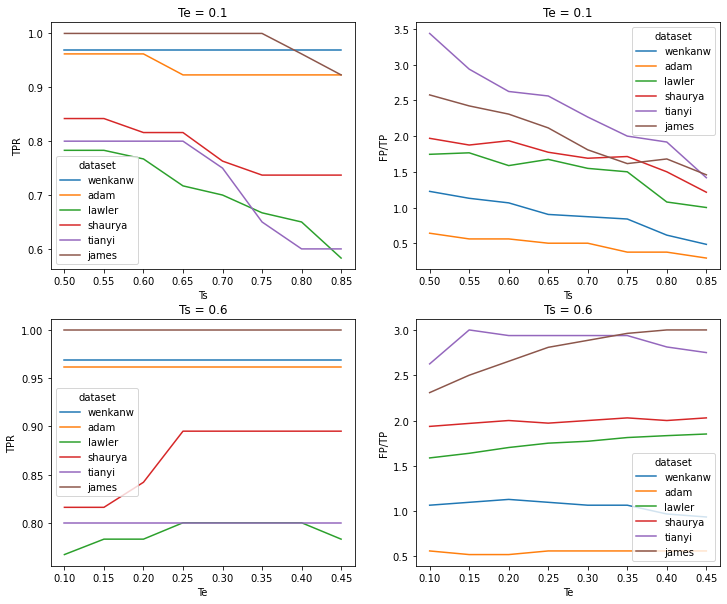

In [28]:
from visualization import *
plot_threshold_results(threshold_results,te_val = 0.1, ts_val=0.6)

Fixed Te, Change Ts


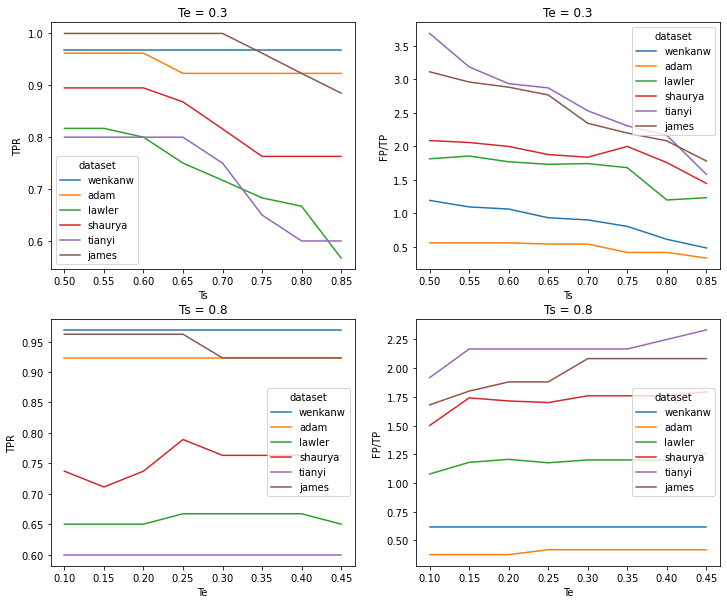

In [29]:
plot_threshold_results(threshold_results,te_val = 0.3, ts_val=0.8)

In [30]:
# ! ls ../models/tianyi_models
# ! ls ../results/hysteresis_results/

In [31]:
# person='tianyi'
# model_name = '../models/{}_models/cv_fold_{}_acti_model_M_F_6.000000Min.h5'.format(person, 0)
# print(model_name)
# m = tf.keras.models.load_model(model_name)

## 4.2 Apply individual parameters to Individual models and compare with group model

In [38]:
threshold_results= pd.read_csv("../results/hysteresis_results/cv_threshold_results.csv")
best_threshold=pd.read_csv("../results/hysteresis_results/cv_best_thresholds.csv")

In [45]:
# best_threshold
x = best_threshold[['dataset','Ts','Te']].T

In [49]:
persons = ['wenkanw','adam','lawler','shaurya','tianyi','james']
ind_thresholds = {}
for p in persons:
    ind_thresholds[p]=[]
    ind_thresholds[p].append(best_threshold[best_threshold['dataset']==p]['Ts'].values[0])
    ind_thresholds[p].append(best_threshold[best_threshold['dataset']==p]['Te'].values[0])
ind_thresholds

{'wenkanw': [0.85, 0.1],
 'adam': [0.85, 0.1],
 'lawler': [0.5, 0.4],
 'shaurya': [0.65, 0.1],
 'tianyi': [0.65, 0.1],
 'james': [0.85, 0.1]}

In [52]:



%time meal_info, time_perf2,episode_perf2 = cross_validation_metrics(balance_ratio= balance_ratio, model_arch = acti_model, fold_num = 5, winmin=6, stridesec = 5, \
                                                             names= persons,model_name= "acti_model", \
                                                             random_seed=random_seed,  test_balance=False, re_train =False, \
                                                             test_CAD=False, metrics =['episode'], load_data =False, ind_threshold =ind_thresholds)

episode_perf2 = pd.merge(left=meal_info,right=episode_perf2,on="dataset")

/home/wenkanw/.conda/envs/mlenv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Loading Dataset ...
Loading File:  ../data/IndividualData/wenkanw-data/11-14-20/11-14-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-13-20/10-13-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-9-20/10-10-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-21-20/Dinner/Dinner.shm
Loading File:  ../data/IndividualData/wenkanw-data/9-17-20/9-17-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/9-29-20/9-29-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-22-20/Lunch/Lunch.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-21-20/lunch/lunch.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-9-20/10-9-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-18-20/11-18-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-14-20/10-14-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/10-12-20/10-12-20.shm
Loading File:  ../data/IndividualData/wenkanw-data/11-16-20/11-16-20.shm
Loading File:  ../data/Indi

100%|██████████| 4/4 [00:00<00:00, 354.65it/s]

Train set size: 6630, with 3315 positive samples and 3315 negative samples
Test set size: 1658, with 829 positive samples and 829 negative samples
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 332.48it/s]


total_meal: 32 TP:  6 FP:  2 FN:  1
Segmentation Completed. 
total_meal: 32 TP:  3 FP:  2 FN:  4
Fold: 1 Train on days:  [ 0  1  2  3  8  9 10 11 12 13 14 15 16] Test on days:  [4 5 6 7]


100%|██████████| 4/4 [00:00<00:00, 312.28it/s]

Train set size: 7209, with 3604 positive samples and 3605 negative samples
Test set size: 1803, with 902 positive samples and 901 negative samples
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 469.45it/s]


total_meal: 32 TP:  7 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  4 FP:  1 FN:  3
Fold: 2 Train on days:  [ 0  1  2  3  4  5  6  7 11 12 13 14 15 16] Test on days:  [ 8  9 10]


100%|██████████| 3/3 [00:00<00:00, 259.55it/s]

Train set size: 7222, with 3611 positive samples and 3611 negative samples
Test set size: 1806, with 903 positive samples and 903 negative samples



100%|██████████| 3/3 [00:00<00:00, 243.87it/s]


Segmentation Completed. 
total_meal: 32 TP:  6 FP:  8 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  3 FN:  1
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 14 15 16] Test on days:  [11 12 13]


100%|██████████| 3/3 [00:00<00:00, 337.56it/s]

Train set size: 6971, with 3485 positive samples and 3486 negative samples
Test set size: 1743, with 872 positive samples and 871 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 331.78it/s]


total_meal: 32 TP:  7 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  5 FP:  0 FN:  2
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] Test on days:  [14 15 16]


100%|██████████| 3/3 [00:00<00:00, 370.72it/s]

Train set size: 6923, with 3461 positive samples and 3462 negative samples
Test set size: 1731, with 866 positive samples and 865 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 250.93it/s]


total_meal: 32 TP:  5 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 32 TP:  3 FP:  0 FN:  2
Loading Dataset ...
Loading File:  ../data/IndividualData/adam-data/12-01-2020/12-01-2020.shm
Loading File:  ../data/IndividualData/adam-data/11-24-2020/11-24-2020.shm
Loading File:  ../data/IndividualData/adam-data/11-30-2020/11-30-2020.shm
Loading File:  ../data/IndividualData/adam-data/09-22-2020/09-22-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-03-2020/12-03-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-11-2020/12-11-2020.shm
Loading File:  ../data/IndividualData/adam-data/11-25-2020/11-25-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-08-2020/12-08-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-07-2020/12-07-2020.shm
Loading File:  ../data/IndividualData/adam-data/11-26-2020/11-26-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-02-2020/12-02-2020.shm
Loading File:  ../data/IndividualData/adam-data/12-04-2020/12-04-2020

  0%|          | 0/3 [00:00<?, ?it/s]

Train set size: 2536, with 1268 positive samples and 1268 negative samples
Test set size: 634, with 317 positive samples and 317 negative samples


100%|██████████| 3/3 [00:00<00:00, 204.29it/s]


Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  0 FN:  0
Fold: 1 Train on days:  [ 0  1  2  6  7  8  9 10 11 12 13] Test on days:  [3 4 5]


100%|██████████| 3/3 [00:00<00:00, 422.26it/s]

Train set size: 3008, with 1504 positive samples and 1504 negative samples
Test set size: 752, with 376 positive samples and 376 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 415.14it/s]


total_meal: 26 TP:  4 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0
Fold: 2 Train on days:  [ 0  1  2  3  4  5  9 10 11 12 13] Test on days:  [6 7 8]


100%|██████████| 3/3 [00:00<00:00, 311.15it/s]

Train set size: 2892, with 1446 positive samples and 1446 negative samples
Test set size: 724, with 362 positive samples and 362 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 293.79it/s]


total_meal: 26 TP:  5 FP:  1 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  2 FN:  1
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8 12 13] Test on days:  [ 9 10 11]


100%|██████████| 3/3 [00:00<00:00, 348.81it/s]

Train set size: 3051, with 1525 positive samples and 1526 negative samples
Test set size: 763, with 382 positive samples and 381 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 320.96it/s]


total_meal: 26 TP:  4 FP:  4 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  1 FN:  1
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11] Test on days:  [12 13]


100%|██████████| 2/2 [00:00<00:00, 240.96it/s]

Train set size: 2790, with 1395 positive samples and 1395 negative samples
Test set size: 698, with 349 positive samples and 349 negative samples
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 225.52it/s]


total_meal: 26 TP:  5 FP:  1 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  0 FN:  0
Loading Dataset ...
Loading File:  ../data/IndividualData/lawler-data/10.19/10.19.shm
Loading File:  ../data/IndividualData/lawler-data/11.14/11.14.shm
Loading File:  ../data/IndividualData/lawler-data/10.10/10.10.shm
Loading File:  ../data/IndividualData/lawler-data/11.2/11.2.shm
Loading File:  ../data/IndividualData/lawler-data/10.8/10.8.shm
Loading File:  ../data/IndividualData/lawler-data/11.15/11.15.shm
Loading File:  ../data/IndividualData/lawler-data/10.14/10.14.shm
Loading File:  ../data/IndividualData/lawler-data/9.23/9.23_13hr.shm
Loading File:  ../data/IndividualData/lawler-data/10.12/10.12.shm
Loading File:  ../data/IndividualData/lawler-data/11.11/11.11.shm
Loading File:  ../data/IndividualData/lawler-data/11.4/11.4.shm
Loading File:  ../data/IndividualData/lawler-data/9.25/9.25_1-46.shm
Loading File:  ../data/IndividualData/lawler-data/10.6/10.6.shm
Loading File:  ../data/Indi

100%|██████████| 5/5 [00:00<00:00, 339.73it/s]

Train set size: 6892, with 3446 positive samples and 3446 negative samples
Test set size: 1724, with 862 positive samples and 862 negative samples
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 317.50it/s]


total_meal: 60 TP:  9 FP:  20 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  5 FP:  15 FN:  8
Fold: 1 Train on days:  [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22] Test on days:  [5 6 7 8 9]


100%|██████████| 5/5 [00:00<00:00, 270.76it/s]

Train set size: 5915, with 2957 positive samples and 2958 negative samples
Test set size: 1479, with 740 positive samples and 739 negative samples
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 263.55it/s]


total_meal: 60 TP:  9 FP:  29 FN:  4
Segmentation Completed. 
total_meal: 60 TP:  2 FP:  13 FN:  11
Fold: 2 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22] Test on days:  [10 11 12 13 14]


100%|██████████| 5/5 [00:00<00:00, 436.76it/s]

Train set size: 7139, with 3569 positive samples and 3570 negative samples
Test set size: 1785, with 893 positive samples and 892 negative samples
Segmentation Completed. 



100%|██████████| 5/5 [00:00<00:00, 396.45it/s]


total_meal: 60 TP:  9 FP:  10 FN:  1
Segmentation Completed. 
total_meal: 60 TP:  2 FP:  10 FN:  8
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 19 20 21 22] Test on days:  [15 16 17 18]


100%|██████████| 4/4 [00:00<00:00, 253.03it/s]

Train set size: 6206, with 3103 positive samples and 3103 negative samples
Test set size: 1552, with 776 positive samples and 776 negative samples
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 382.82it/s]


total_meal: 60 TP:  13 FP:  13 FN:  0
Segmentation Completed. 
total_meal: 60 TP:  7 FP:  6 FN:  6
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] Test on days:  [19 20 21 22]


100%|██████████| 4/4 [00:00<00:00, 502.61it/s]

Train set size: 7318, with 3659 positive samples and 3659 negative samples
Test set size: 1830, with 915 positive samples and 915 negative samples
Segmentation Completed. 



100%|██████████| 4/4 [00:00<00:00, 504.84it/s]


total_meal: 60 TP:  9 FP:  13 FN:  2
Segmentation Completed. 
total_meal: 60 TP:  4 FP:  8 FN:  7
Loading Dataset ...
Loading File:  ../data/IndividualData/shaurya-data/12.3.2020/Consensys Exported Data.shm
Loading File:  ../data/IndividualData/shaurya-data/11.15.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/10.22.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/1.16.2021/Consensys Exported Data.shm
Loading File:  ../data/IndividualData/shaurya-data/1.10.2021/Consensys Exported Data.shm
Loading File:  ../data/IndividualData/shaurya-data/10.25.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/11.1.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/11.18.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/11.17.2020/Data.shm
Loading File:  ../data/IndividualData/shaurya-data/1.13.2021/Consensys Exported Data.shm
Loading File:  ../data/IndividualData/shaurya-data/1.11.2021/Consensys Exported Data.shm
Loading File

  0%|          | 0/3 [00:00<?, ?it/s]

Train set size: 7873, with 3936 positive samples and 3937 negative samples
Test set size: 1969, with 985 positive samples and 984 negative samples


100%|██████████| 3/3 [00:00<00:00, 225.88it/s]


Segmentation Completed. 
total_meal: 38 TP:  7 FP:  16 FN:  1
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  8 FN:  1
Fold: 1 Train on days:  [ 0  1  2  6  7  8  9 10 11 12] Test on days:  [3 4 5]
Train set size: 8523, with 4261 positive samples and 4262 negative samples
Test set size: 2131, with 1066 positive samples and 1065 negative samples


100%|██████████| 3/3 [00:00<00:00, 242.51it/s]


Segmentation Completed. 
total_meal: 38 TP:  5 FP:  10 FN:  4
Segmentation Completed. 
total_meal: 38 TP:  7 FP:  5 FN:  2
Fold: 2 Train on days:  [ 0  1  2  3  4  5  9 10 11 12] Test on days:  [6 7 8]
Train set size: 8411, with 4205 positive samples and 4206 negative samples
Test set size: 2103, with 1052 positive samples and 1051 negative samples


100%|██████████| 3/3 [00:00<00:00, 173.69it/s]


Segmentation Completed. 
total_meal: 38 TP:  9 FP:  17 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  9 FP:  5 FN:  0
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8 11 12] Test on days:  [ 9 10]


100%|██████████| 2/2 [00:00<00:00, 262.05it/s]

Train set size: 8438, with 4219 positive samples and 4219 negative samples
Test set size: 2110, with 1055 positive samples and 1055 negative samples
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 240.80it/s]


total_meal: 38 TP:  6 FP:  4 FN:  0
Segmentation Completed. 
total_meal: 38 TP:  5 FP:  3 FN:  1
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10] Test on days:  [11 12]


100%|██████████| 2/2 [00:00<00:00, 303.58it/s]

Train set size: 9217, with 4608 positive samples and 4609 negative samples
Test set size: 2305, with 1153 positive samples and 1152 negative samples
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 292.84it/s]


total_meal: 38 TP:  4 FP:  8 FN:  2
Segmentation Completed. 
total_meal: 38 TP:  2 FP:  4 FN:  4
Loading Dataset ...
Loading File:  ../data/IndividualData/tianyi-data/1-18-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/2-3-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-25-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-19-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-26-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-20-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-31-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-16-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-27-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-14-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/2-2-21/Shimmer-Data.shm
Loading File:  ../data/IndividualData/tianyi-data/1-28-21/Sh

100%|██████████| 3/3 [00:00<00:00, 250.63it/s]

Train set size: 5016, with 2508 positive samples and 2508 negative samples
Test set size: 1254, with 627 positive samples and 627 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 223.13it/s]


total_meal: 20 TP:  3 FP:  6 FN:  2
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  2
Fold: 1 Train on days:  [ 0  1  2  6  7  8  9 10 11 12 13] Test on days:  [3 4 5]
Train set size: 5630, with 2815 positive samples and 2815 negative samples
Test set size: 1408, with 704 positive samples and 704 negative samples


100%|██████████| 3/3 [00:00<00:00, 210.82it/s]


Segmentation Completed. 
total_meal: 20 TP:  3 FP:  11 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  5 FN:  0
Fold: 2 Train on days:  [ 0  1  2  3  4  5  9 10 11 12 13] Test on days:  [6 7 8]


100%|██████████| 3/3 [00:00<00:00, 356.52it/s]

Train set size: 5380, with 2690 positive samples and 2690 negative samples
Test set size: 1346, with 673 positive samples and 673 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 345.16it/s]


total_meal: 20 TP:  4 FP:  13 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  6 FN:  2
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7  8 12 13] Test on days:  [ 9 10 11]


100%|██████████| 3/3 [00:00<00:00, 316.31it/s]

Train set size: 5148, with 2574 positive samples and 2574 negative samples
Test set size: 1288, with 644 positive samples and 644 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 293.08it/s]


total_meal: 20 TP:  3 FP:  3 FN:  1
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  3 FN:  1
Fold: 4 Train on days:  [ 0  1  2  3  4  5  6  7  8  9 10 11] Test on days:  [12 13]


100%|██████████| 2/2 [00:00<00:00, 266.71it/s]

Train set size: 6030, with 3015 positive samples and 3015 negative samples
Test set size: 1508, with 754 positive samples and 754 negative samples
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 243.18it/s]


total_meal: 20 TP:  3 FP:  8 FN:  0
Segmentation Completed. 
total_meal: 20 TP:  3 FP:  2 FN:  0
Loading Dataset ...
Loading File:  ../data/IndividualData/james-data/02-03-2021/Day13.shm
Loading File:  ../data/IndividualData/james-data/02-02-2021/Day12.shm
Loading File:  ../data/IndividualData/james-data/02-01-2021/Day11.shm
Loading File:  ../data/IndividualData/james-data/1-30-2021/Day9.shm
Loading File:  ../data/IndividualData/james-data/1-26-2021/Day5.shm
Loading File:  ../data/IndividualData/james-data/1-25-2021/Day4.shm
Loading File:  ../data/IndividualData/james-data/1-29-2021/Day8.shm
Loading File:  ../data/IndividualData/james-data/1-24-2021/Day3.shm
Loading File:  ../data/IndividualData/james-data/02-04-2021/Day14.shm
Loading File:  ../data/IndividualData/james-data/1-31-2021/Day10.shm
Loading File:  ../data/IndividualData/james-data/1-27-2021/Day6.shm
Loading File:  ../data/IndividualData/james-data/1-28-2021/Day7.shm
Fold: 0 Train on days:  [ 3  4  5  6  7  8  9 10 11] Test 

100%|██████████| 3/3 [00:00<00:00, 239.14it/s]

Train set size: 5969, with 2984 positive samples and 2985 negative samples
Test set size: 1493, with 747 positive samples and 746 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 223.78it/s]


total_meal: 26 TP:  5 FP:  9 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  14 FN:  1
Fold: 1 Train on days:  [ 0  1  2  6  7  8  9 10 11] Test on days:  [3 4 5]


100%|██████████| 3/3 [00:00<00:00, 235.53it/s]

Train set size: 5648, with 2824 positive samples and 2824 negative samples
Test set size: 1412, with 706 positive samples and 706 negative samples
Segmentation Completed. 



100%|██████████| 3/3 [00:00<00:00, 225.15it/s]


total_meal: 26 TP:  7 FP:  15 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  6 FP:  10 FN:  1
Fold: 2 Train on days:  [ 0  1  2  3  4  5  8  9 10 11] Test on days:  [6 7]


  0%|          | 0/2 [00:00<?, ?it/s]

Train set size: 6529, with 3264 positive samples and 3265 negative samples
Test set size: 1633, with 817 positive samples and 816 negative samples


100%|██████████| 2/2 [00:00<00:00, 178.67it/s]


Segmentation Completed. 
total_meal: 26 TP:  4 FP:  2 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  4 FP:  5 FN:  0
Fold: 3 Train on days:  [ 0  1  2  3  4  5  6  7 10 11] Test on days:  [8 9]
Train set size: 7297, with 3648 positive samples and 3649 negative samples
Test set size: 1825, with 913 positive samples and 912 negative samples


100%|██████████| 2/2 [00:00<00:00, 162.37it/s]


Segmentation Completed. 
total_meal: 26 TP:  3 FP:  3 FN:  0
Segmentation Completed. 
total_meal: 26 TP:  3 FP:  4 FN:  0
Fold: 4 Train on days:  [0 1 2 3 4 5 6 7 8 9] Test on days:  [10 11]


100%|██████████| 2/2 [00:00<00:00, 233.58it/s]

Train set size: 6740, with 3370 positive samples and 3370 negative samples
Test set size: 1686, with 843 positive samples and 843 negative samples
Segmentation Completed. 



100%|██████████| 2/2 [00:00<00:00, 219.12it/s]

total_meal: 26 TP:  5 FP:  6 FN:  1
Segmentation Completed. 
total_meal: 26 TP:  5 FP:  6 FN:  1
CPU times: user 47.2 s, sys: 1.75 s, total: 49 s
Wall time: 49.4 s


In [55]:
episode_metrics_individual_param = print_episode_metrics(episode_perf2)
episode_metrics_individual_param

,dataset,Days,Meal_Hours,Meal_Counts,win(sec),TPR: Individual-Model,TPR: GroupModel,FP/TP: Individual-Model,FP/TP: GroupModel,TP: Individual-Model,TP: GroupModel,FP: Individual-Model,FP: GroupModel,FN: Individual-Model,FN: GroupModel
0,wenkanw,17,7,32,360,0.969,0.625,0.484,0.3,31,20,15,6,1,12
1,adam,14,3,26,360,0.923,0.923,0.292,0.333,24,24,7,8,2,2
2,lawler,23,7,60,360,0.817,0.333,1.735,2.6,49,20,85,52,11,40
3,shaurya,13,9,38,360,0.816,0.789,1.774,0.833,31,30,55,25,7,8
4,tianyi,14,5,20,360,0.8,0.75,2.562,1.267,16,15,41,19,4,5
5,james,12,6,26,360,0.923,0.885,1.458,1.696,24,23,35,39,2,3
6,average performance,-,-,-,-,0.875,0.717,1.384,1.172,29.167,22,39.667,24.833,4.5,11.667


In [56]:
save_path = "../results/"
episode_metrics_individual_param.to_csv(save_path+"episode_metrics/updated_cv_fold5_episode_metrics_individual_param.csv",index=False)

In [58]:
# episode_metrics_individual_param = pd.read_csv(save_path+"episode_metrics/updated_cv_fold5_episode_metrics_individual_param.csv")
